# Titanic Sandbox for EDA and Model Tuning

In [334]:
%matplotlib inline

#turns off the depreciation warning messages in Jupyter at runtime.
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

import pandas as pd
pd.options.display.max_columns = 100 #show max 100 pandas columns

from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
import pylab as plot

#pylab dictionary preconfigures matplotlib pyplot params
params = {
    'axes.labelsize': "large",
    'xtick.labelsize': "x-large",
    'legend.fontsize': 20,
    'figure.dpi': 150,
    'figure.figsize': [25,7]
}
plot.rcParams.update(params)

In [335]:
# sets up Jupyter to center the plots
from IPython.core.display import HTML
HTML("""
<style>
.output_png{
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""");

In [336]:
# load training set data
data = pd.read_csv('.\\data\\train.csv')

In [337]:
data.shape

(891, 12)

In [338]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**PassengerId**: and id given to each traveler on the boat\
**Pclass**: the passenger class. It has three possible values: 1,2,3 (first, second and third class)\
The **Name** of the passeger\
The **Sex**\
The **Age**\
**SibSp**: number of siblings and spouses traveling with the passenger\
**Parch**: number of parents and children traveling with the passenger\
The **Ticket** number
The ticket **Fare**\
The **Cabin** number\
**Embarked**. This describe three possible areas of the Titanic from which the people embark. Three \possible values S,C,Q\
The three ports were Queesntown, Ireland (present day Cobh, Ireland), Southampton, U.K., and Cherbourg, France.

In [339]:
data.describe() #Note the missing AGE values (in count)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [340]:
# Add the age median as the value for missing values
data['Age'] = data['Age'].fillna(data['Age'].median())
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## EDA

### Gender

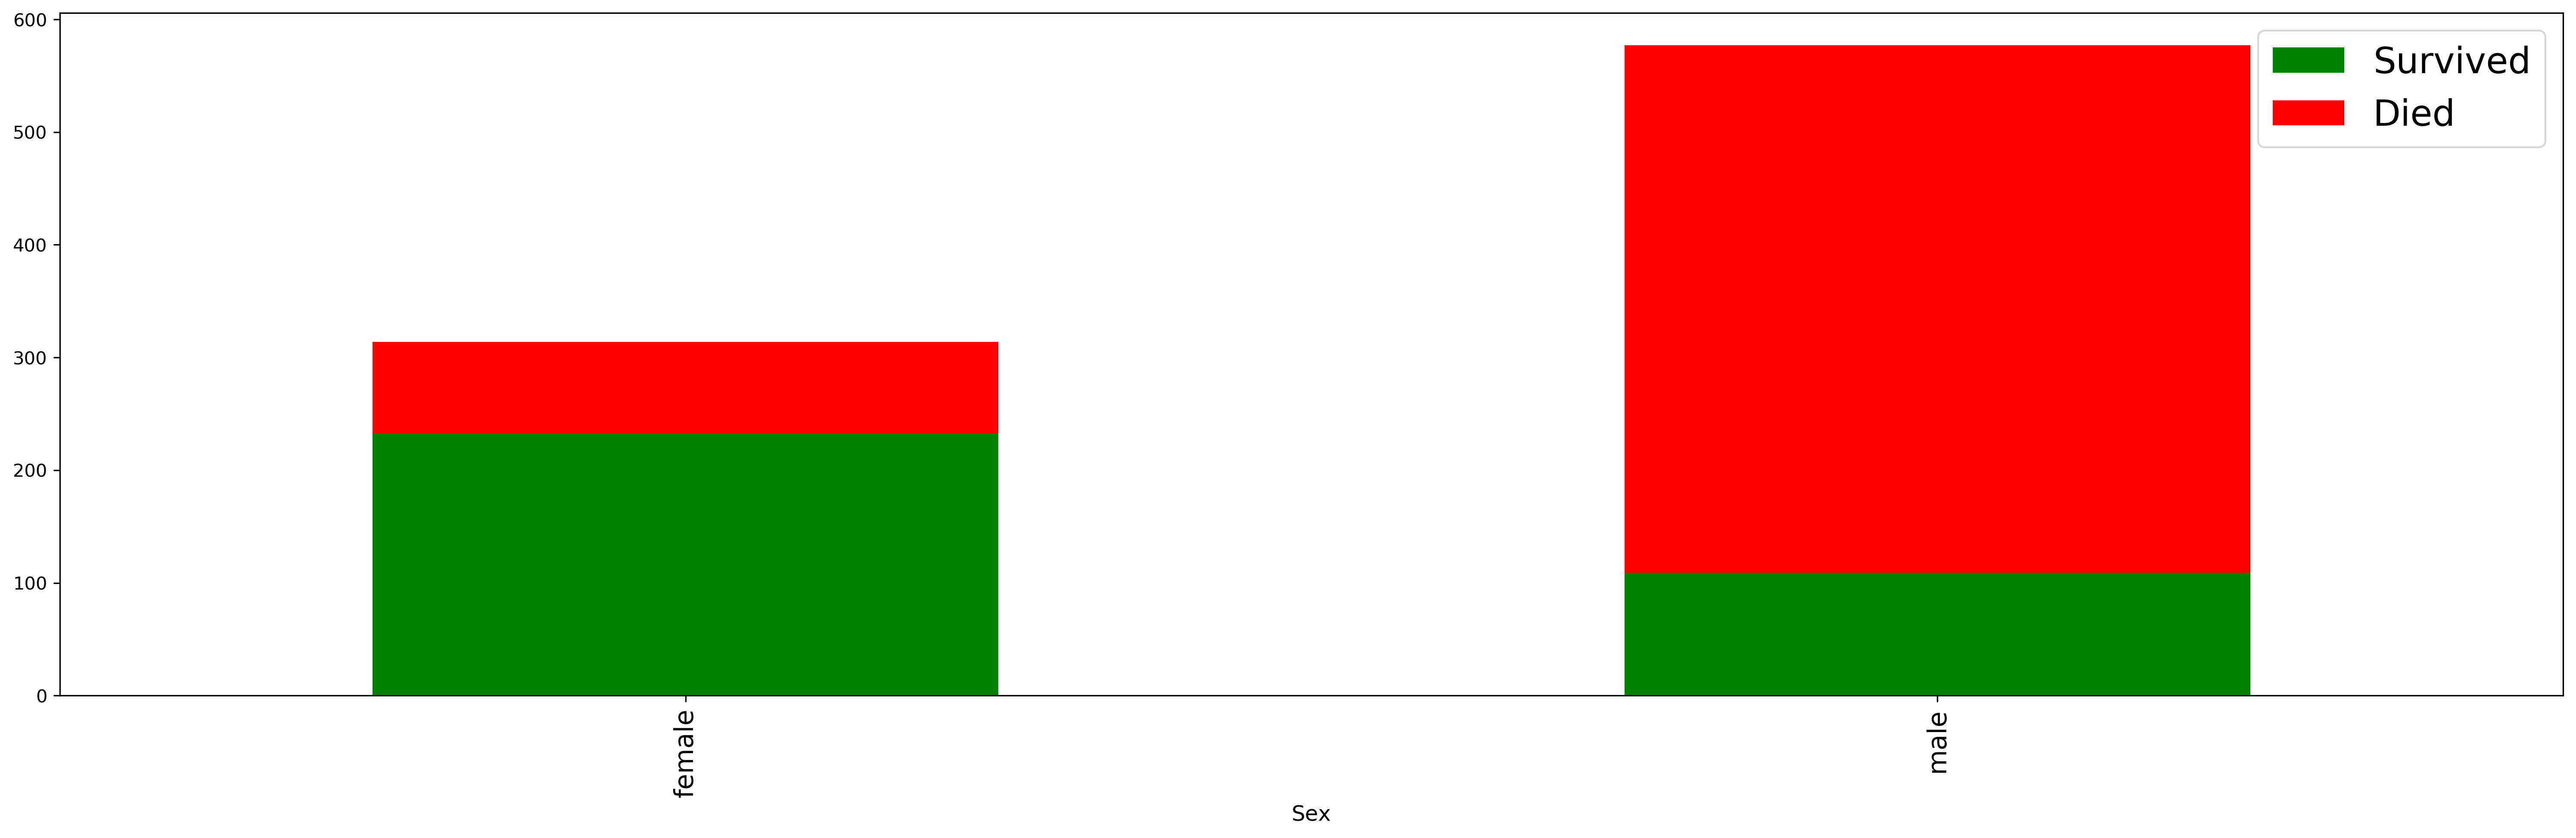

In [341]:
#Plot survival by gender
data['Died'] = 1 - data['Survived']
data.groupby('Sex').agg('sum')[['Survived', 'Died']].plot(kind='bar',figsize=(25,7),
                                                        stacked=True, color = ['g','r'])

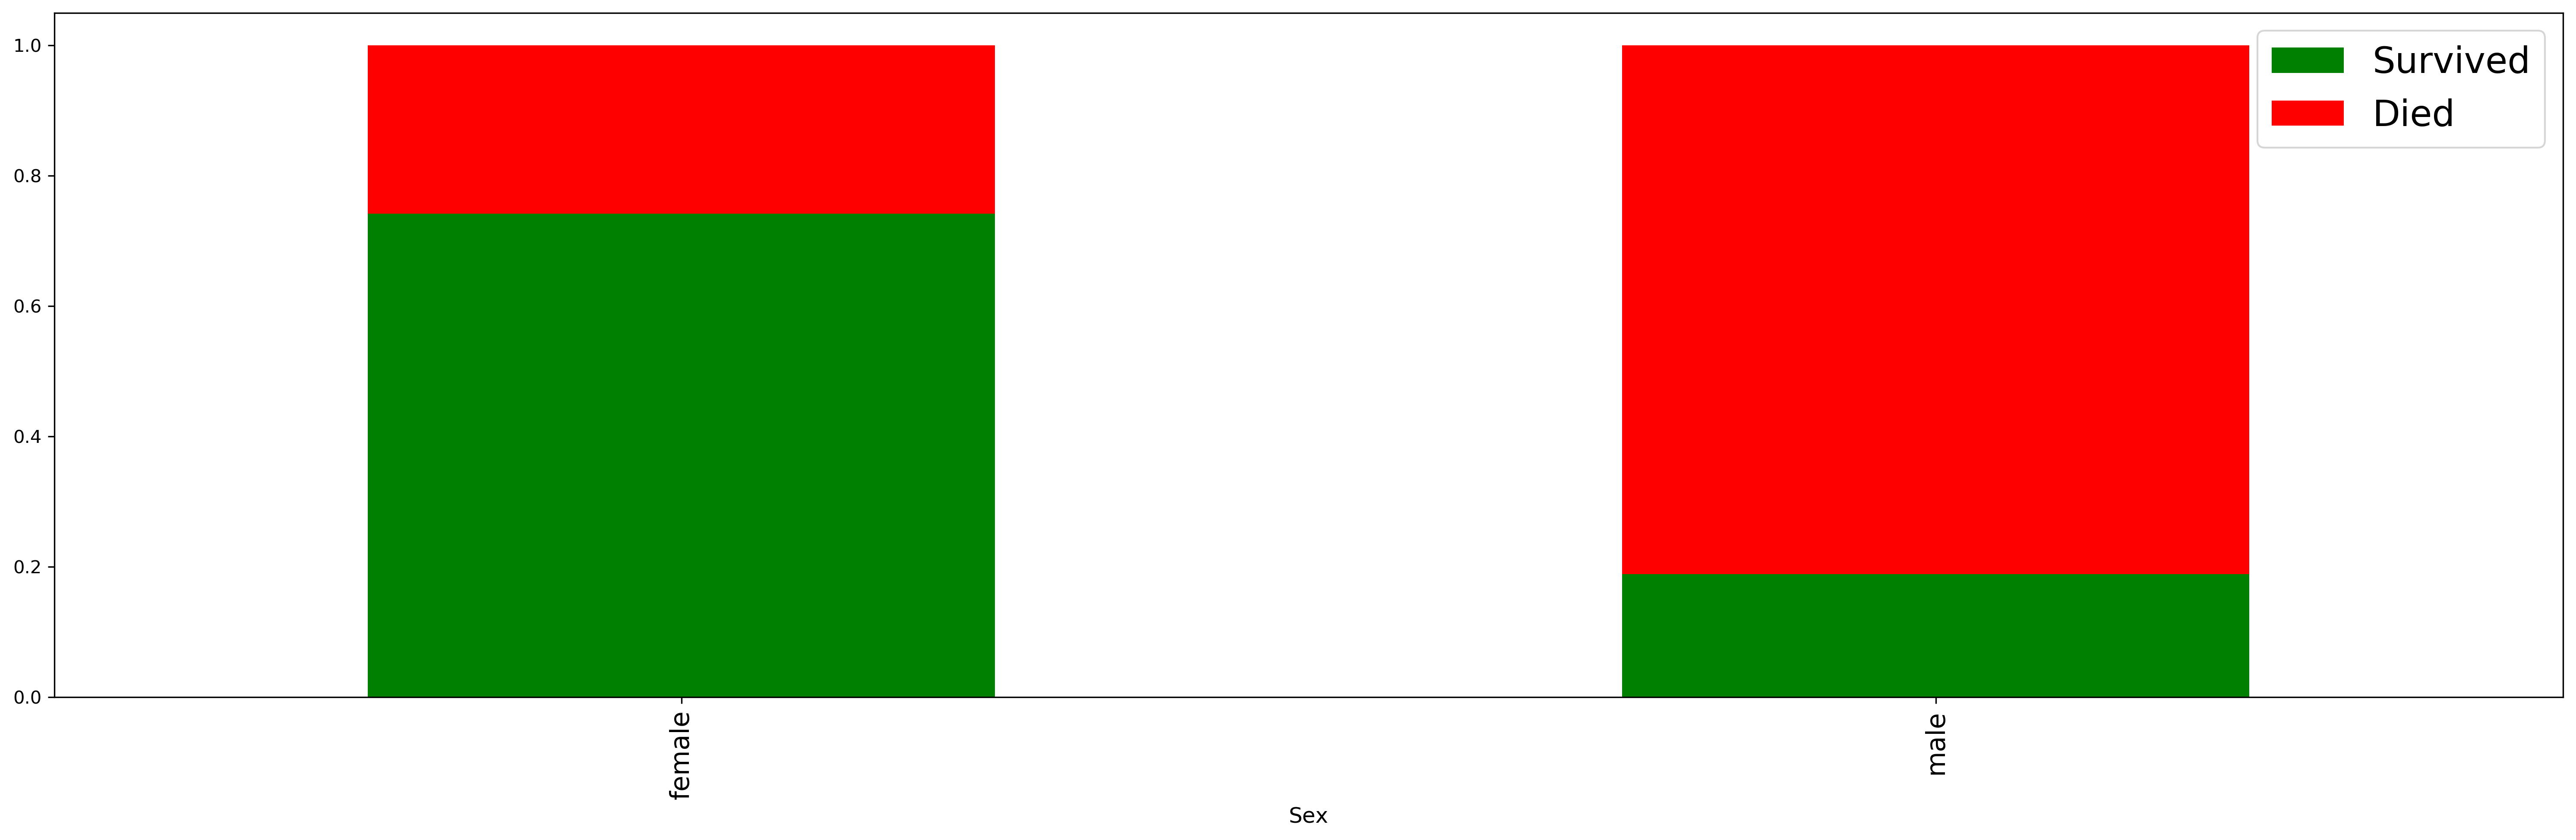

In [342]:
#same plot but normalized (difference is mean aggrigation as opposed to sum aggregation (above))
data.groupby('Sex').agg('mean')[['Survived','Died']].plot(kind='bar', figsize=(25,7),
                                                       stacked=True, color = ['g','r'])

In [343]:
#Women tent to survive at a higher rate than men (70ish% vs. 20ish%, respectively)

### Age

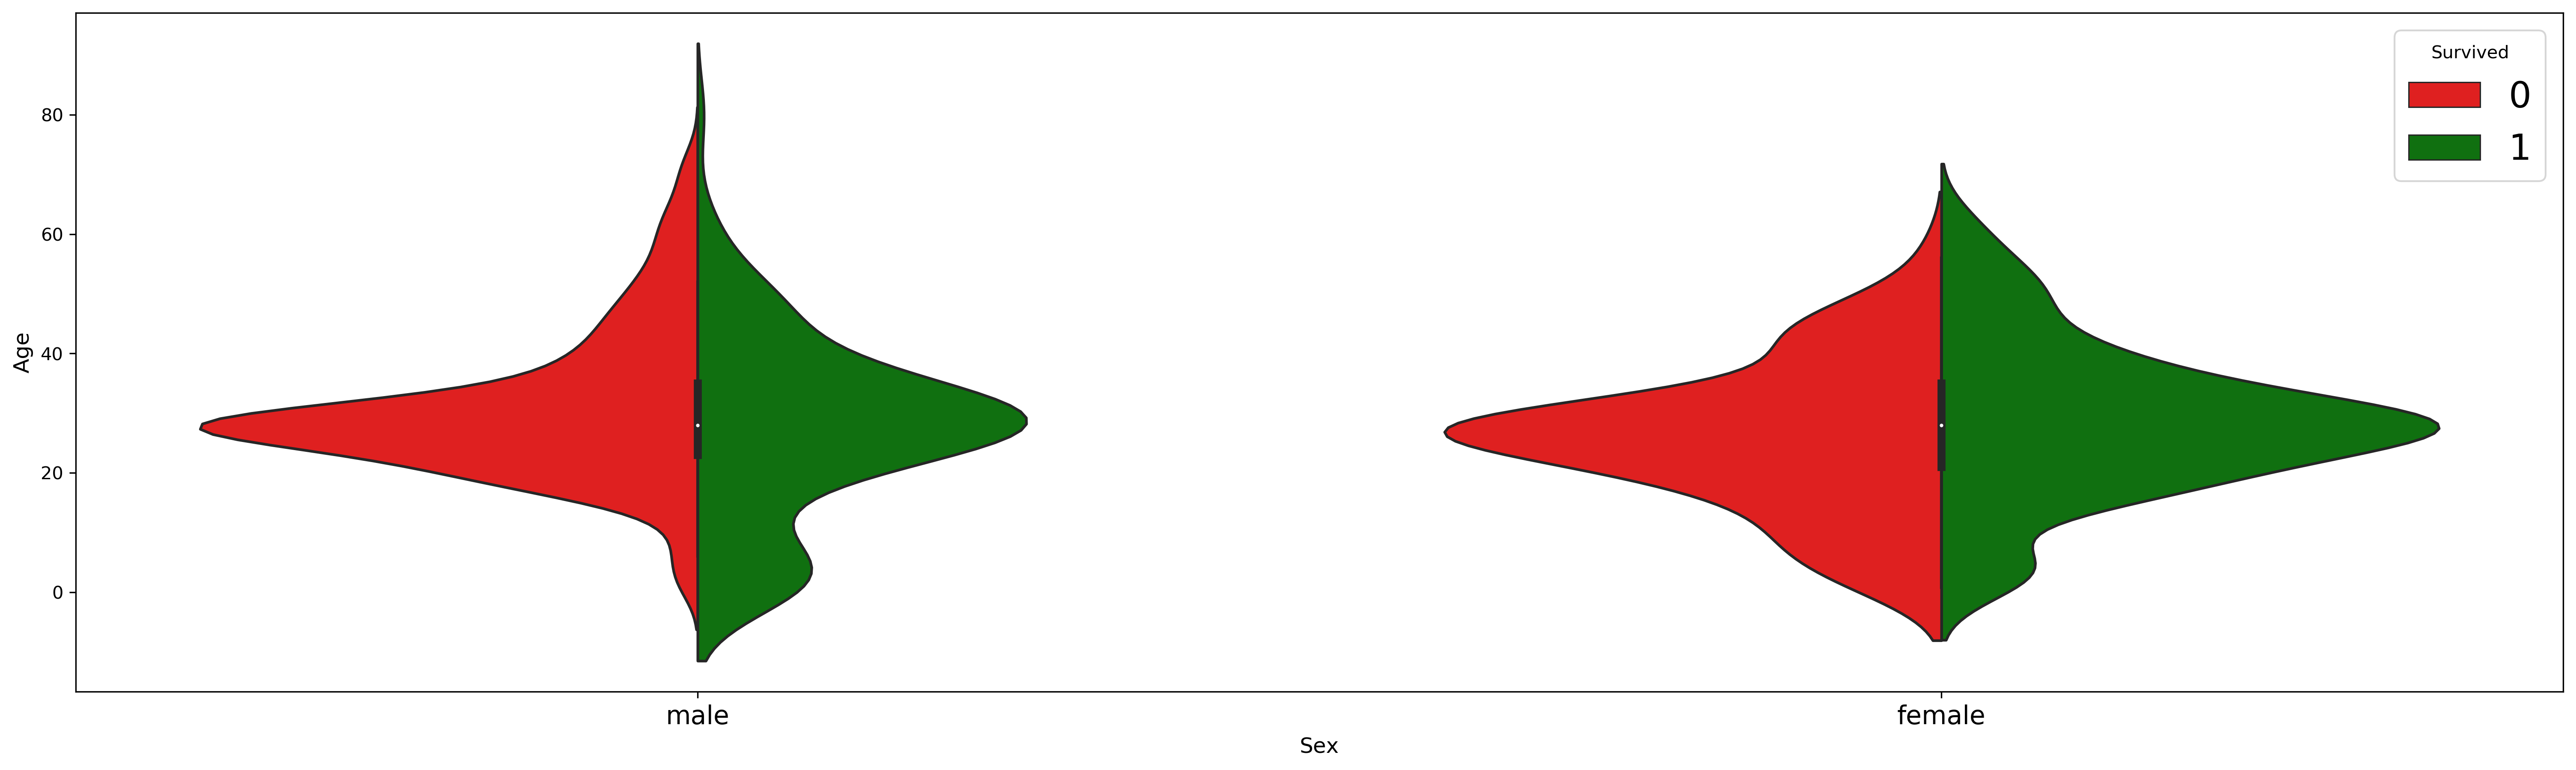

In [344]:
#plot survival by age (broken out by gender)
fig = plt.figure(figsize=(25,7))
sns.violinplot(x='Sex',y='Age',
              hue='Survived', data=data,
               split=True,
               palette={0: "r", 1: "g"}
              );

In [345]:
# More men appear to have died than women based on comparison of red areas.  Men tend to survive more
#if young whereas women do not.

### Ticketprice

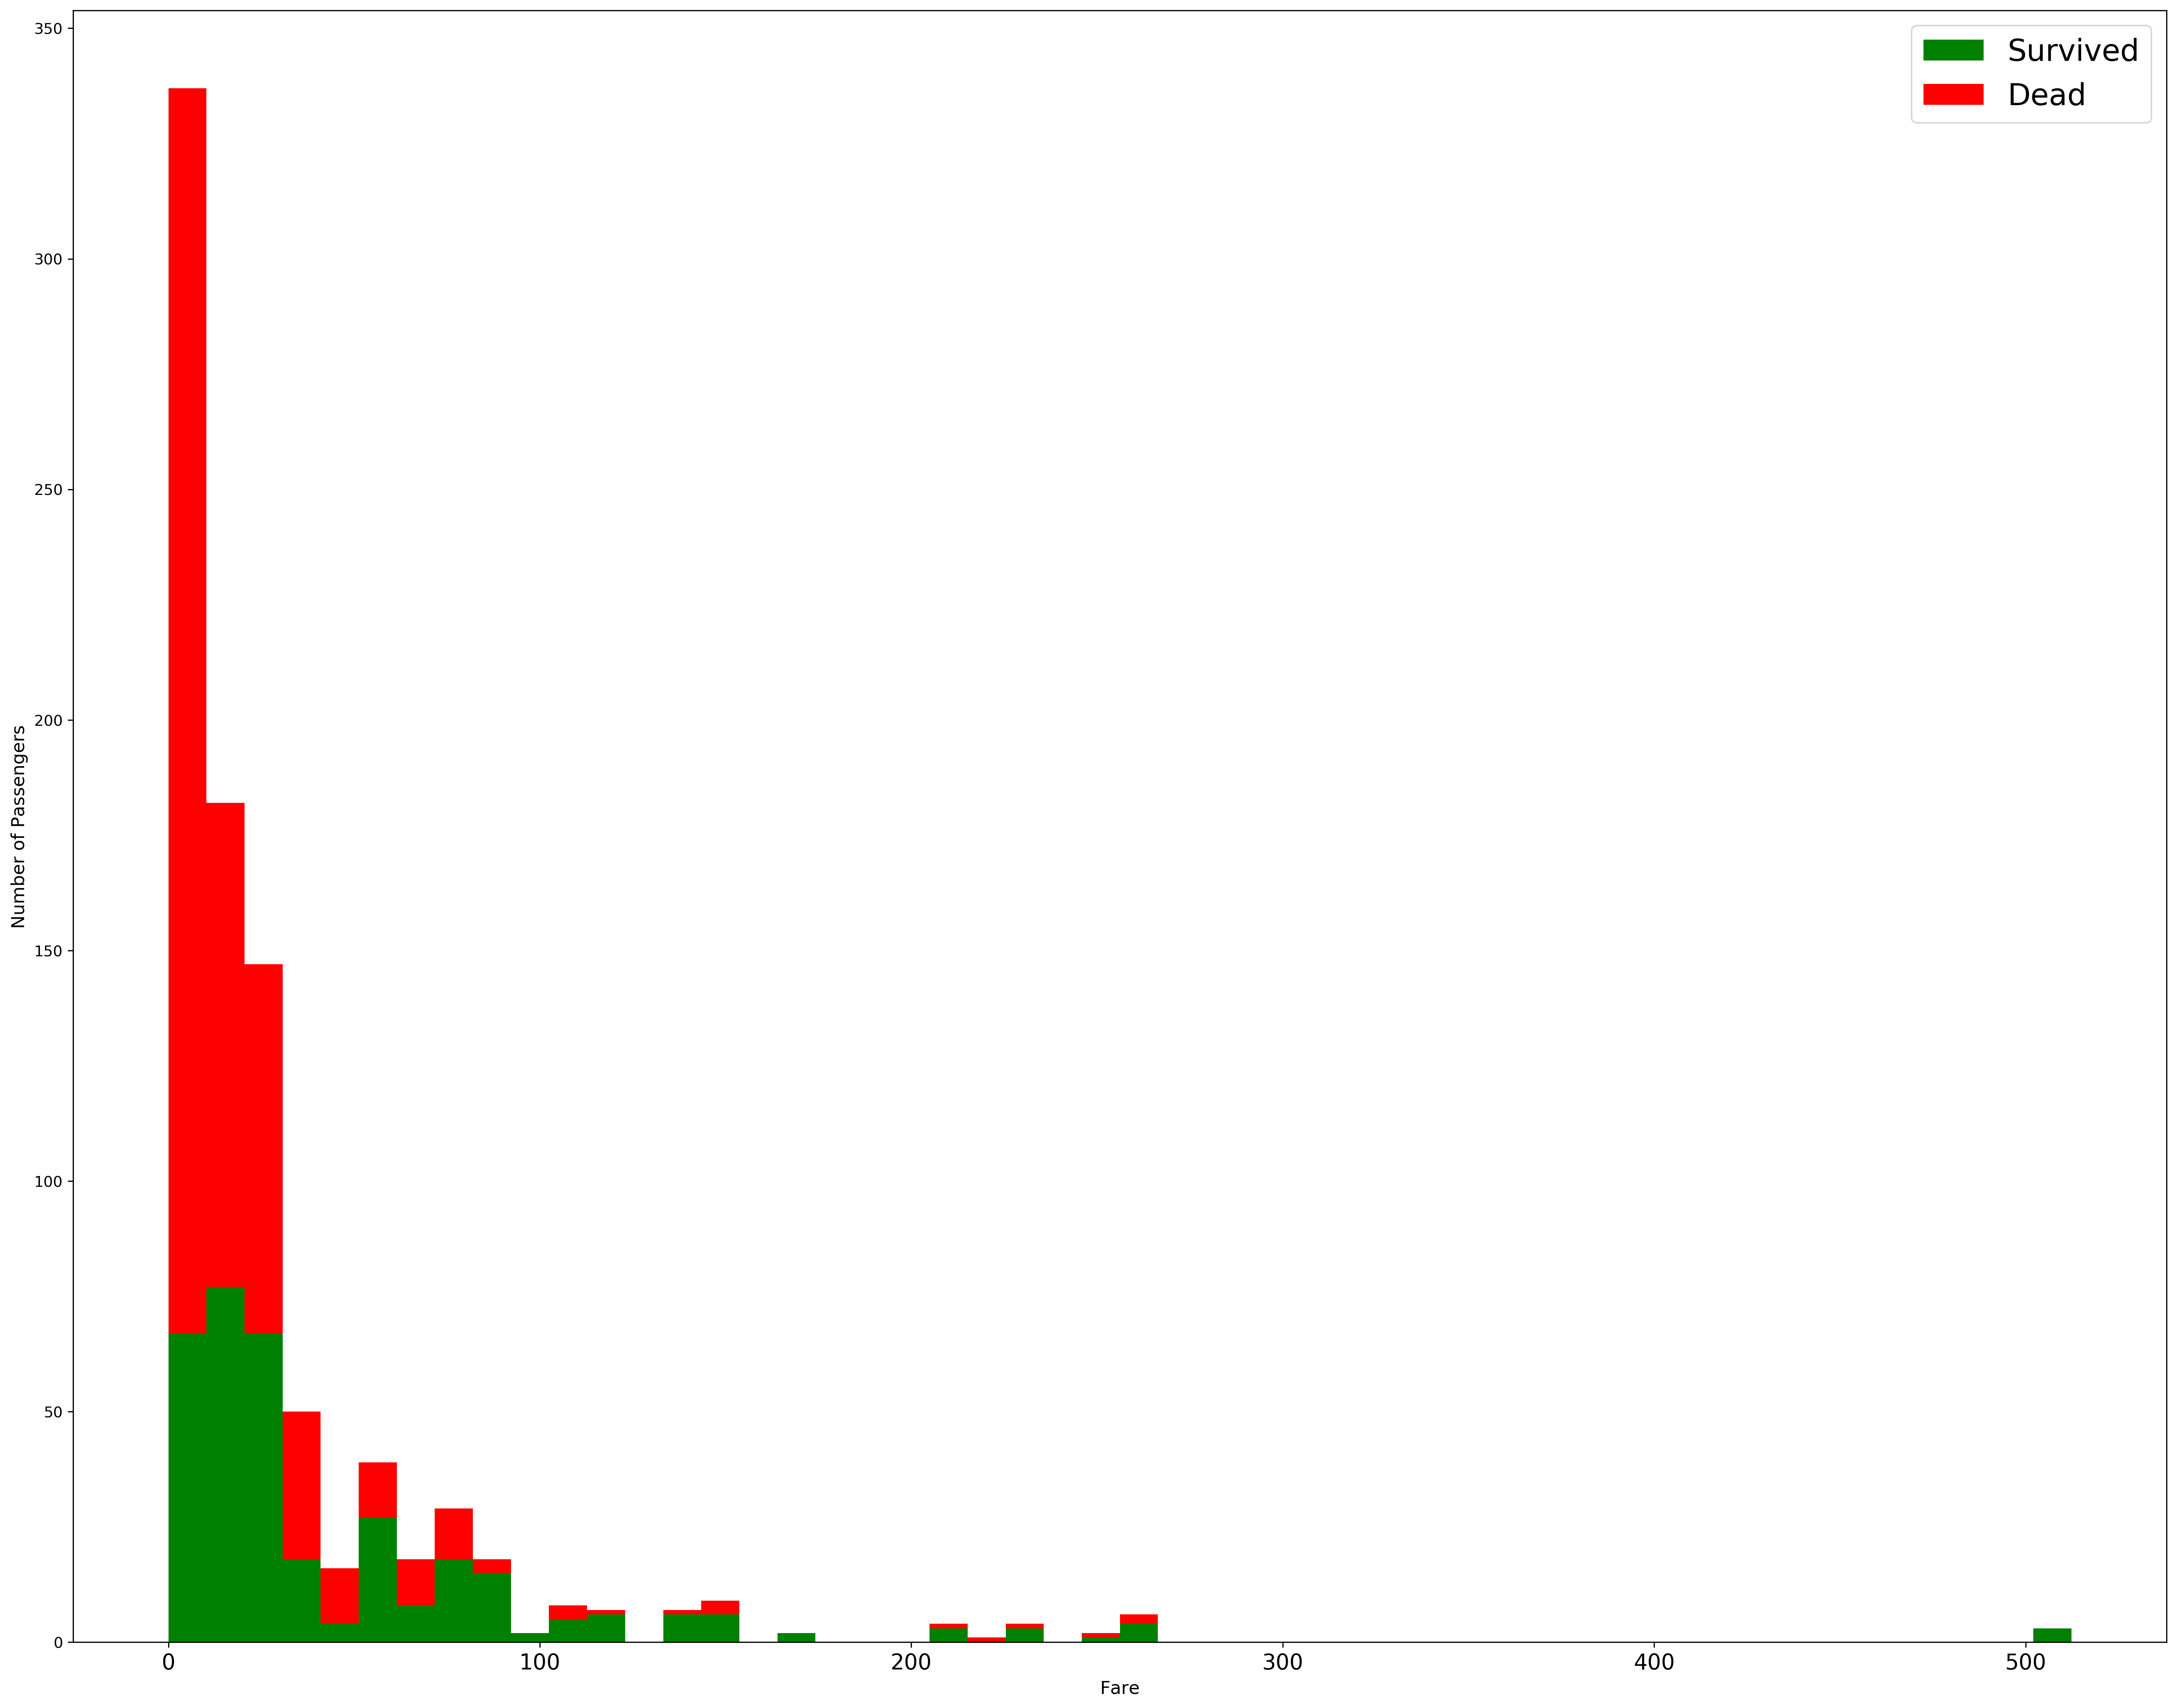

In [346]:
figure = plt.figure(figsize = (25,20))
plt.hist([data[data['Survived']==1]['Fare'],data[data['Survived']==0]['Fare']],
        stacked=True, color=['g','r'],
        bins=50,label=['Survived','Dead'])
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

In [347]:
#Cheap tickets died at a higher rate (per ticket price range) than expensive tickets

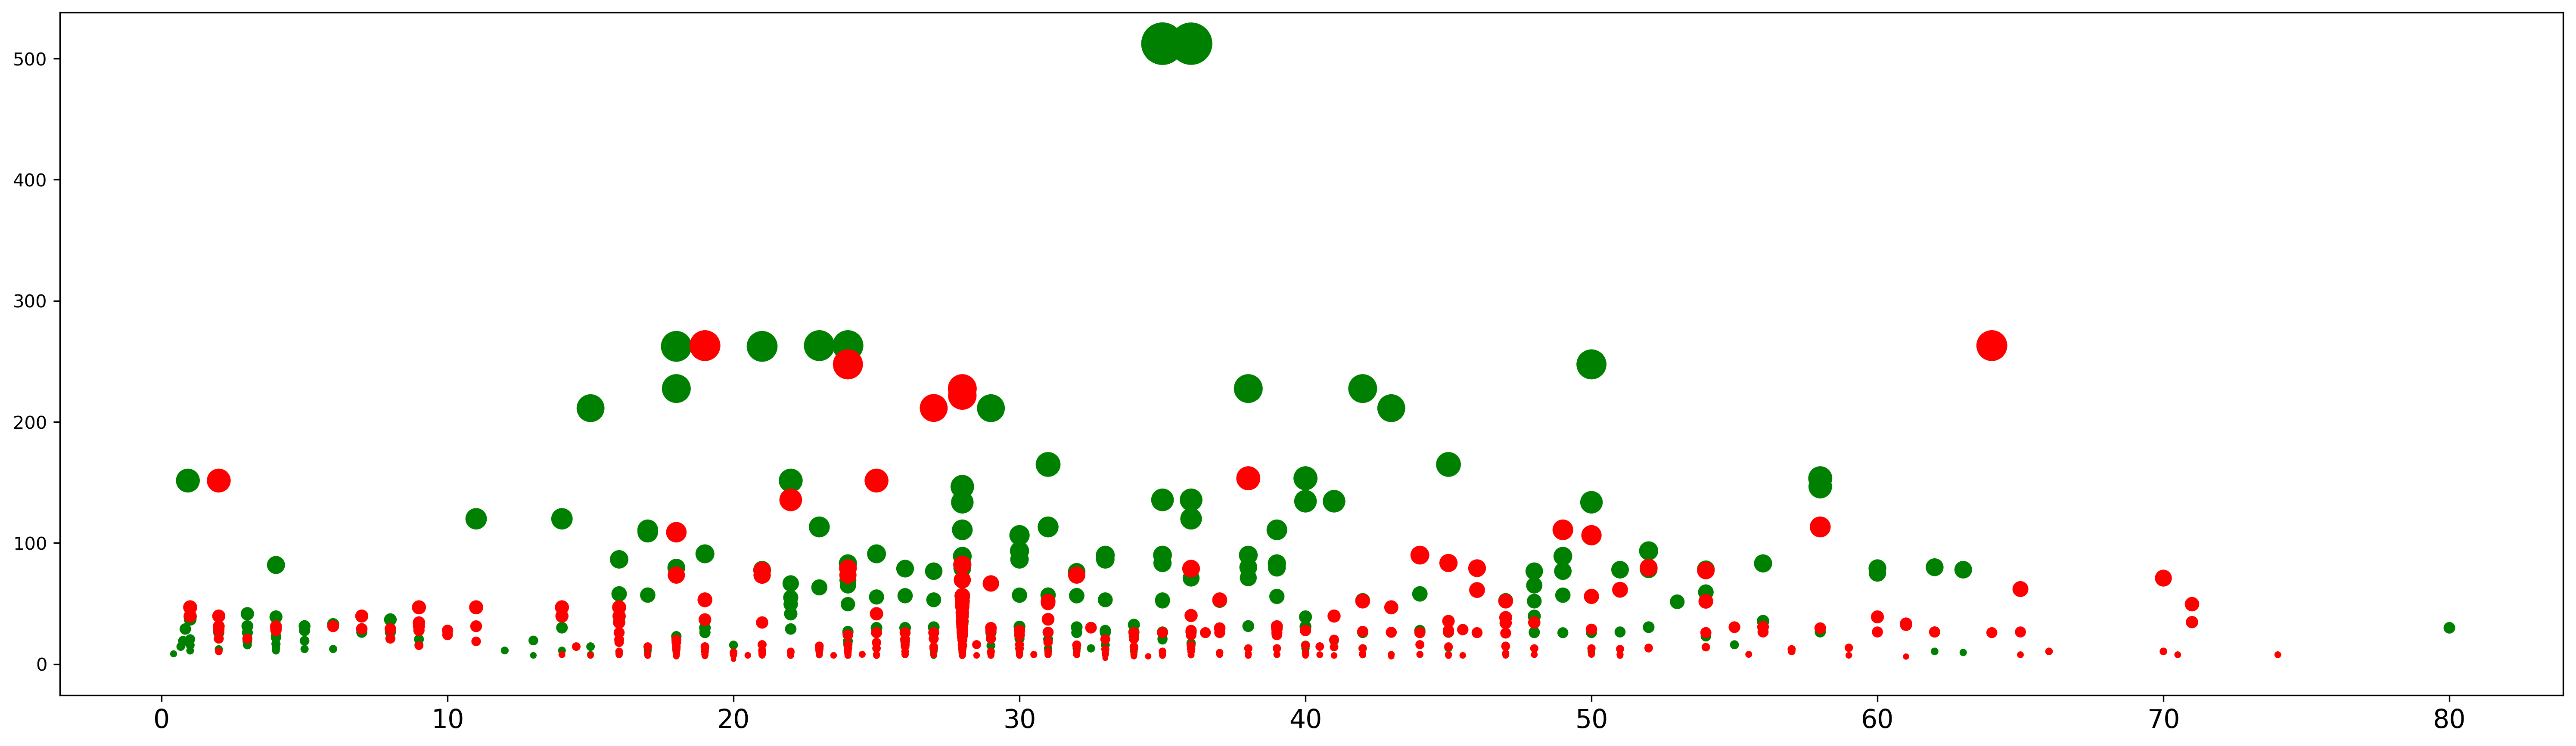

In [348]:
plt.figure(figsize=(25,7))
ax = plt.subplot()

ax.scatter(data[data['Survived']==1]['Age'], data[data['Survived']==1]['Fare'],c='green', s=data[data['Survived']==1]['Fare'])
ax.scatter(data[data['Survived']==0]['Age'],data[data['Survived']==0]['Fare'],c='red', s=data[data['Survived']==0]['Fare']);

In [349]:
# Green = Survived.  Red = Died.  Size of Dot (and Y axis) is Ticket Fare. X axis is age of passenger.
# Expensive tickets survived at a higher rate than cheap tickets.

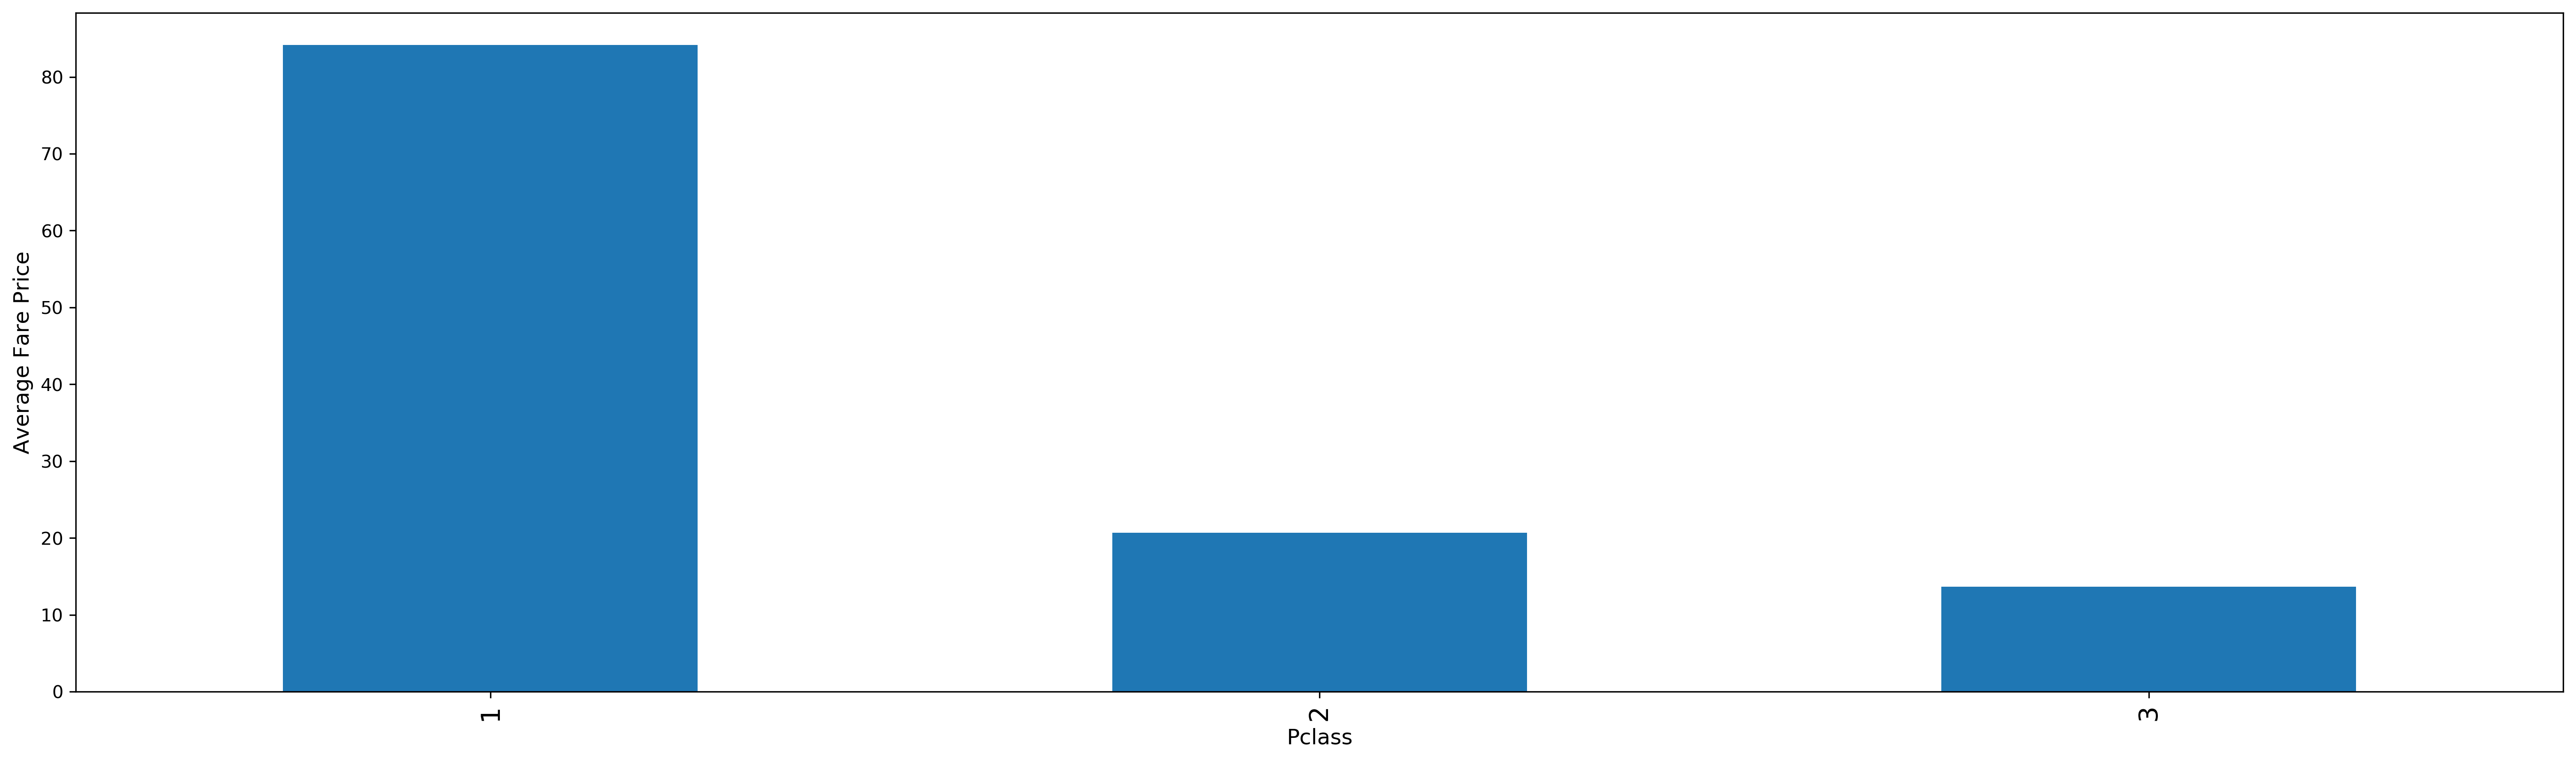

In [350]:
ax=plt.subplot()
ax.set_ylabel('Average Fare Price')
data.groupby('Pclass').mean()['Fare'].plot(kind='bar',figsize=(25,7),ax=ax);

In [351]:
#Mean Fare vs. Median Fare didn't appreciably change the fare distribution per class.   
#Higher class status paid more money.

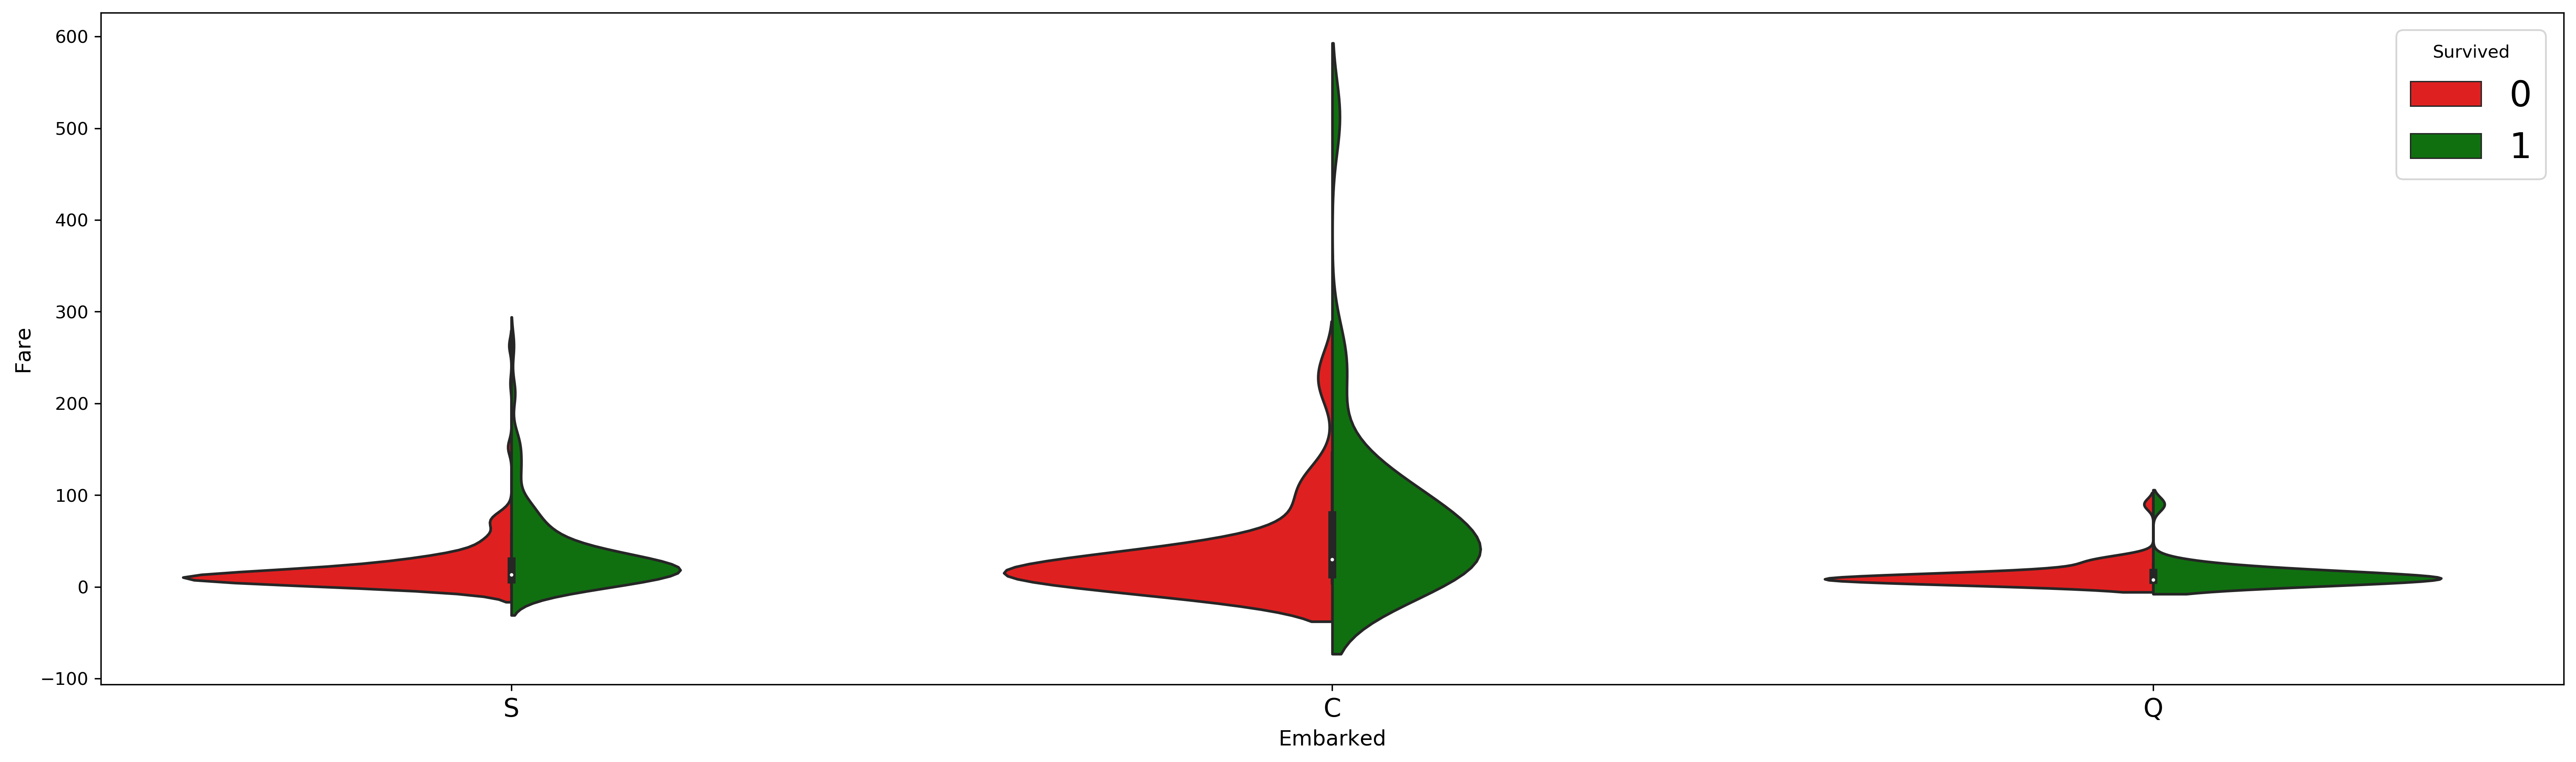

In [352]:
fig=plt.figure(figsize=(25,7))
sns.violinplot(x='Embarked',y='Fare',hue='Survived',data=data,split=True,palette={0:'r',1:'g'})

In [353]:
#mapped by Fare Price (y-axis) vs. Survived for the three ports of Embarkation. Queesntown, Ireland (present day Cobh, Ireland),
#Southampton, U.K., and Cherbourg, France.  Cherbourg harbor has a higher tail on the Fare distribution,
# followed by Southampton.  Both those high tails have disproportionate survival rates. 

## Feature Engineering

In [354]:
#function asserts whether or not a feature has been processed
def status(feature):
    print('Processing',feature, ': ok')
    
#Goal is engineer features in training set then add to test set so we don't see or use test data

def get_combined_data():
    
    #read training data
    train = pd.read_csv('.\\data\\train.csv') #891 in training set

    #read test data
    test = pd.read_csv('.\\data\\test.csv')    

    #separate out the response (y) variable (survived)
    targets = train.Survived
    train.drop(['Survived'],1,inplace=True)
    
    #merge train and test data for feature engineering
    #remove passenger id index (not useful)
    combined = train.append(test)
    combined.reset_index(inplace=True)
    combined.drop(['index','PassengerId'],inplace=True,axis=1)
    
    return combined

combined = get_combined_data()

In [355]:
print(combined.shape)

(1309, 10)


In [356]:
combined.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Extracting Passenger Titles from Names

In [357]:
# glean social status via title.  Parse name, extract title, assign binary attribute that reflects status.
titles = set()
for name in data['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())
    
print(titles)

{'Don', 'Jonkheer', 'Lady', 'Mme', 'Col', 'Mr', 'Mlle', 'Major', 'Master', 'Miss', 'Mrs', 'Sir', 'Rev', 'Capt', 'Ms', 'Dr', 'the Countess'}


In [358]:
Title_Dictionary = {
'Don': 'Royalty', 
'Ms':'Mrs', 
'Mr':'Mr', 
'Mme': 'Mrs', 
'Col': 'Officer', 
'Mrs':'Mrs', 
'Jonkheer': 'Royalty',
'the Countess':'Royalty',
'Rev':'Officer', 
'Dona': 'Royalty', 
'Sir':'Royalty', 
'Master': 'Master', 
'Major':'Officer', 
'Miss': 'Miss',
'Dr':'Officer', 
'Lady': 'Royalty', 
'Capt': 'Officer', 
'Mlle': 'Miss'   
}

In [359]:
def get_titles():
    #Extract the title from each name
    combined['Title'] = combined['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
    
    #map each title
    combined['Title'] = combined.Title.map(Title_Dictionary)
    status('Title')
    return combined

In [360]:
combined = get_titles()
combined.head()

Processing Title : ok


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [361]:
#Check if there are any missing titles
combined[combined['Title'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


### Processing Age

In [362]:
#Processing Ages - We are missing several ages so we need to figure out what values to assign
combined[combined['Age'].isnull()]


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss
...,...,...,...,...,...,...,...,...,...,...,...
1299,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,Miss
1301,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,Miss
1304,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
1307,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr


In [363]:
print("There are",combined[combined['Age'].isnull()].shape[0], "passengers missing an Age variable in combined test and training sets.")

There are 263 passengers missing an Age variable in combined test and training sets.


In [364]:
#Number of missing ages in training set
print(combined.iloc[:891].Age.isnull().sum())

177


In [365]:
#Number of missing ages in test set
print(combined.iloc[891:].Age.isnull().sum())

86


In [366]:
#We group them by Gender, Passenger Class, and Title to get the median age.  This is what we'll assign to the missing,
#as opposed to a blanked median value for the whole set.
grouped_train =  combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train = grouped_train.median()
grouped_median_train = grouped_median_train.reset_index()[['Sex','Pclass','Title','Age']]

grouped_median_train.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,30.0
1,female,1,Mrs,40.0
2,female,1,Officer,49.0
3,female,1,Royalty,40.5
4,female,2,Miss,24.0


In [367]:
#Checking the Std Dev of each category.  They're all about the same except Officer (probably only one)
grouped_train_std =  combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train_std = grouped_train_std.std()
grouped_median_train_std = grouped_median_train_std.reset_index()[['Sex','Pclass','Title','Age']]

grouped_median_train_std.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,12.629276
1,female,1,Mrs,12.779119
2,female,1,Officer,NaN
3,female,1,Royalty,10.606602
4,female,2,Miss,13.374708


In [368]:
#Checking the count of each category.  The officer should be only 1 to explain the std dev nan above.
grouped_train_count =  combined.iloc[:891].groupby(['Sex','Pclass','Title'])
grouped_median_train_count = grouped_train_count.count()
grouped_median_train_count = grouped_median_train_count.reset_index()[['Sex','Pclass','Title','Age']]

grouped_median_train_count.head()

,Sex,Pclass,Title,Age
0,female,1,Miss,47
1,female,1,Mrs,35
2,female,1,Officer,1
3,female,1,Royalty,2
4,female,2,Miss,32


In [369]:
#Define a function to fill in the missing ages based on the different attributes 'Sex', 'Title', 'Pclass'.
def fill_age(row):
    condition = (
        (grouped_median_train['Sex']==row['Sex'])&
        (grouped_median_train['Title']==row['Title'])&
        (grouped_median_train['Pclass']==row['Pclass'])
    )
    return grouped_median_train[condition]['Age'].values[0]

def process_age():
    global combined #The combined variable is global so can be references inside fill_age without passing it in.
    #a function that fills the missing values of the Age variable
    combined['Age'] = combined.apply(lambda row: fill_age(row) if np.isnan(row['Age']) else row['Age'],axis=1)
    return combined

combined = process_age()

### Processing Names

In [370]:
def process_names():
    #drop names column since we've extracted titles and don't need them.
    global combined
    combined.drop('Name', axis=1, inplace=True)
    
    # We one hot encode the title variables
    titles_dummies = pd.get_dummies(combined['Title'],prefix='Title')
    combined = pd.concat([combined, titles_dummies],axis=1)
    
    #removing the title variable
    combined.drop('Title',axis=1,inplace=True)
    
    status('names')
    return combined

In [371]:
combined = process_names()

combined.head()

Processing names : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,0,0
1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0
3,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,0,1,0,0
4,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,0


### Processing Fare

In [372]:
#check for missing Fare values
combined[combined.Fare.isna()==True]
#There is one missing Fare in the dataset

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
1043,3,male,60.5,0,0,3701,NaN,NaN,S,0,0,1,0,0,0


In [373]:
#When a fare value is missing, this will use the mean value from the training set to fill it in.
def process_fares():
    global combined
    combined.Fare.fillna(combined.iloc[:891].Fare.mean(), inplace=True)
    status('Fare') #status is function defined above, not python standard.
    return combined

In [374]:
#The function call to process fares
combined = process_fares()

Processing Fare : ok


### Processing Embarked

In [375]:
#Check for missing 'Embarked' values
combined[combined.Embarked.isna()==True]
#There are two missing fares in the dataset
#We'll fill them with the most frequent value in the training set

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
61,1,female,38.0,0,0,113572,80.0,B28,NaN,0,1,0,0,0,0
829,1,female,62.0,0,0,113572,80.0,B28,NaN,0,0,0,1,0,0


In [376]:
def process_embarked():
    global combined
    combined.Embarked.fillna('S',inplace=True)
    #One Hot Encoding the embarked port
    embarked_dummies = pd.get_dummies(combined['Embarked'],prefix='Embarked')
    combined = pd.concat([combined, embarked_dummies],axis=1)
    combined.drop('Embarked',axis=1,inplace=True)#Not useful now since it's categories have been one hot encoded.
    status('embarked') #check status of the action
    return combined
    

In [377]:
#The function call to process Fares
combined = process_embarked()

combined.head()

Processing embarked : ok


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S
0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,0,0,1,0,0,1,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,C123,0,0,0,1,0,0,0,0,1
4,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,0,0,0,1


### Processing Cabin

In [378]:
#We verify that all cabin letters in the Training set are in the Test set.
train_cabin, test_cabin = set(), set()

#adding cabin letters from the Training set.
for c in combined.iloc[:891]['Cabin']:
    try:
        train_cabin.add(c[0])
    except:
        train_cabin.add('U')

#adding cabin letters from the Test set
for c in combined.iloc[891:]['Cabin']:
    try:
        test_cabin.add(c[0])
    except:
        test_cabin.add('U')


print("Training Cabins: ",train_cabin)

print("Test Cabins: ", test_cabin)


Training Cabins:  {'C', 'G', 'T', 'A', 'F', 'B', 'E', 'U', 'D'}
Test Cabins:  {'C', 'G', 'A', 'F', 'B', 'E', 'U', 'D'}


In [379]:
#All cabins in the Test set are present in the Training set as well.
#This function replaces Nan values with 'U', then One Hot Encodes cabin categories in the combined dataset
def process_cabin():
    global combined
    #replacing missing cabins with U (for Unknown)
    combined.Cabin.fillna('U', inplace=True)
    
    #Mapping each cabin value to each cabin class letter
    combined['Cabin'] = combined['Cabin'].map(lambda c: c[0])
    
    #One Hot Encoding the cabin letters
    cabin_dummies = pd.get_dummies(combined['Cabin'], prefix='Cabin')
    combined = pd.concat([combined, cabin_dummies],axis=1)
    
    #Drop the original 'Cabin' feature
    combined.drop('Cabin',axis=1,inplace=True)
    status('cabin')
    return combined

In [380]:
#The function call to process Cabins
combined = process_cabin()

Processing cabin : ok


In [381]:
combined.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,3,male,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
1,1,female,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
2,3,female,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,1,female,35.0,1,0,113803,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,3,male,35.0,0,0,373450,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


### Processing Gender

In [382]:
#We change Male and Female to 1 and 0.
#Only two categories so we don't need to one hot encode.
def process_sex():
    global combined
    combined['Sex'] = combined['Sex'].map({'male':1,'female':0})
    status('Sex')
    return combined

In [383]:
#The function call to process Gender
combined = process_sex()

Processing Sex : ok


### Process Pclass

In [384]:
#One Hot Encode passenger classes 1, 2, and 3
def process_pclass():
    global combined
    pclass_dummies = pd.get_dummies(combined['Pclass'],prefix="Pclass")
    combined = pd.concat([combined,pclass_dummies],axis=1)
    combined.drop('Pclass',axis=1,inplace=True)
    
    status('Pclass')
    return combined

In [385]:
#The funtcion class to call process_pclass()
combined= process_pclass()

Processing Pclass : ok


### Processing Ticket

In [386]:
combined.head(3)

,Sex,Age,SibSp,Parch,Ticket,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3
0,1,22.0,1,0,A/5 21171,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,0,38.0,1,0,PC 17599,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,0,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [387]:
def cleanTicket(ticket):
    ticket = ticket.replace('.', '')
    ticket = ticket.replace('/', '')
    ticket = ticket.split()
    ticket = map(lambda t : t.strip(), ticket)
    ticket = list(filter(lambda t : not t.isdigit(), ticket))
    if len(ticket) > 0:
        return ticket[0]
    else: 
        return 'XXX'

In [388]:
tickets = set()
for t in combined['Ticket']:
    tickets.add(cleanTicket(t))

In [389]:
print(len(tickets))

37


In [390]:
def process_ticket():
    """Eliminates 'Ticket' and one hot encodes categories of text in original ticket names."""
    global combined

    def cleanTicket(ticket):
        ticket = ticket.replace('.', '')
        ticket = ticket.replace('/', '')
        ticket = ticket.split()
        ticket = map(lambda t : t.strip(), ticket)
        ticket = list(filter(lambda t : not t.isdigit(), ticket))
        if len(ticket) > 0:
            return ticket[0]
        else: 
            return 'XXX'
    
    combined['Ticket'] = combined['Ticket'].map(cleanTicket)
    tickets_dummies = pd.get_dummies(combined['Ticket'],prefix='Ticket')
    combined = pd.concat([combined, tickets_dummies],axis=1)
    combined.drop('Ticket', inplace=True, axis=1)
    
    status('Ticket')
    return combined

In [391]:
combined = process_ticket()

Processing Ticket : ok


In [392]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Processing Family

In [393]:
# Creates new variable based on family size
#assumption is that large families tend to stay together so would help each other and get rescued earlier

In [394]:
def process_family():
    global combined
    combined['FamilySize'] = combined['Parch']+combined['SibSp']+1
    
    #one hot encoding family size categories
    combined['Singleton'] = combined['FamilySize'].map(lambda s: 1 if s ==1 else 0)
    combined['SmallFamily'] = combined['FamilySize'].map(lambda s: 1 if 2<= s<=4 else 0)
    combined['LargeFamily'] = combined['FamilySize'].map(lambda s: 1 if 5<= s else 0)
    
    status('family')
    return combined

In [395]:
combined = process_family()

print(combined.shape)

Processing family : ok
(1309, 67)


In [396]:
combined.head()

,Sex,Age,SibSp,Parch,Fare,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty,Embarked_C,Embarked_Q,Embarked_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Pclass_1,Pclass_2,Pclass_3,Ticket_A,Ticket_A4,Ticket_A5,Ticket_AQ3,Ticket_AQ4,Ticket_AS,Ticket_C,Ticket_CA,Ticket_CASOTON,Ticket_FC,Ticket_FCC,Ticket_Fa,Ticket_LINE,Ticket_LP,Ticket_PC,Ticket_PP,Ticket_PPP,Ticket_SC,Ticket_SCA3,Ticket_SCA4,Ticket_SCAH,Ticket_SCOW,Ticket_SCPARIS,Ticket_SCParis,Ticket_SOC,Ticket_SOP,Ticket_SOPP,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_XXX,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,22.0,1,0,7.2500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
1,0,38.0,1,0,71.2833,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0
2,0,26.0,0,0,7.9250,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0
3,0,35.0,1,0,53.1000,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,0,1,0
4,1,35.0,0,0,8.0500,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


# Modeling

To do:\
1) Break up the combined dataset into train & test.\
2) Use the training set to build a model.\
3) Evaluate teh model with a validation set.\
4) Test the model on the test set.\

In [397]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [398]:
#Use 5-fold cross validation
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring = scoring)
    return np.mean(xval)

def recover_train_test_target():
    global combined
    
    targets = pd.read_csv('.\\data\\train.csv',usecols=['Survived'])['Survived'].values
    train = combined.iloc[:891]
    test = combined.iloc[891:]
    
    return train,test,targets

train,test,targets=recover_train_test_target()

### Feature Selection

Following feature engineering we've got about 60ish features.\
Some are more important (useful) than others.\
We can use tree based estimators (using entropy/information gain) to compute feature importances.\
We can then eliminate irrelevant features.

In [399]:
clf = RandomForestClassifier(n_estimators=100, max_features="log2") #changed from sqrt to log2
clf = clf.fit(train, targets)

View importance of each feature toward life or death

In [400]:
features = pd.DataFrame()
features['feature'] = train.columns
features['importance']= clf.feature_importances_
features.sort_values(by=['importance'],ascending=True, inplace=True)
features.set_index('feature', inplace=True)

features.plot(kind='barh',figsize=(20,50))

sklearn.feture_selection.**SelectFromModel** will select the best features based on importance

In [401]:
model = SelectFromModel(clf, prefit=True) #Calculates the Importance of Features
train_reduced = model.transform(train) #Reduces X to the selected features
#train_reduced = np.array(train)
print(train_reduced.shape)

test_reduced = model.transform(test)
#test_reduced = np.array(test)
print(test_reduced.shape)

(891, 13)
(418, 13)


We see that sklearn kept the top 15 features. #Had we used num estimators 50 (instead of 100)\
then we would have 13 featres preserved

### Params for Keras Model (below)

In [402]:
targets.shape

(891,)

In [403]:
train_features = train_reduced[200:]
train_labels = targets[200:]
val_features = train_reduced[:200]
val_labels = targets[:200]
print(train_features.shape)
print(train_labels.shape)
print(val_features.shape)
print(val_labels.shape)

(691, 13)
(691,)
(200, 13)
(200,)


### Try different base models and evaluate the scores of each.

In [404]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced,y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 0.8181783943255289
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.8215366267026551
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 0.8136902893729208
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 0.830525390747599
****


In [405]:
from sklearn.experimental import enable_hist_gradient_boosting

from sklearn.linear_model import  Perceptron,LassoLars
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier

percept = Perceptron()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
trees = ExtraTreesClassifier()
hist = HistGradientBoostingClassifier()

models = [percept, ada, bag, trees, hist]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=train_reduced,y=targets, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._perceptron.Perceptron'>
CV score = 0.5837549431925178
****
Cross-validation of : <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>
CV score = 0.8036155922415416
****
Cross-validation of : <class 'sklearn.ensemble._bagging.BaggingClassifier'>
CV score = 0.817079907099366
****
Cross-validation of : <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>
CV score = 0.7946393823363255
****
Cross-validation of : <class 'sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier'>
CV score = 0.8327725817588348
****


# Adding a Keras Model to assess performance on the same preprocessed data.

In [406]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import pandas as pd
import os
import tempfile
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [407]:
#Set Matplotlib params
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [408]:
#Checking TF, Keras versions and if GPU is running
print('Using:')
print('\t\u2022 TensorFlow version:', tf.__version__)
print('\t\u2022 tf.keras version:', tf.keras.__version__)
print('\t\u2022 Running on GPU' if tf.test.is_gpu_available() else '\t\u2022 GPU device not found. Running on CPU')

Using:
	• TensorFlow version: 2.3.1
	• tf.keras version: 2.4.0
	• Running on GPU


## Keras Model Log

v1.0 - Used a base model from a similar project with tabular CSV data, and only changed number of input neurons to match   
data set attributes.  Validation score = 0.85.  SKlearn best is 0.83 right now.   
    
    
v1.1 - Turned off early stopping (was patience =30).  Added a Dense layer with 128 neurons followed by 20% dropout.   
       Val is 0.85, but train is 0.84.  Strange behaviour but might be caused by dropout.  
       Will turn off dropout to test this.
       
v1.2 - Only turned off dropout from v1.1.  Val accuracy =  0.83, Train accuracy = 0.84    
final training accuracy slightly higher, but in the noise.  Still the val set is very slightly higher overall    
but in the noise.  Will shuffle the input data and run again with no other changes.     

v1.3 - Used a different validation set by, when parsing training data, used the first 200 samples in the training set    
for validation instead of the previously used last 200 sample in the training set.    Val accuracy = 0.85  , Train accuracy = 0.80.  Now they're trending in the right direction.  I'll need to build pipelines with shuffling.    

v1.4 - 1000 Epochs.  Val trended with Training till about 200, then droppd lower.  Val acc = 0.77, Train accuracy = 0.87    
v1.5 - Turned on 20% dropout after 2nd and 3rd layer.  Went to 1000 Epochs.  Val trended well with training but it     
dropped off slightly about 600.  Val acc = 0.76, Train accuracy = 0.82.

v1.6 - Turned on early stopping with patience  = 50.  Changed interior activtion functions from relu to sigmoid.     
Went to 50 Epochs only.  Clearly trending toward overfitting. Val acc = 0.82, Train accuracy = 0.85.

v1.7 - Previously, it had only been using the 13 features that the SKleran random forest classifier decided were most important.  I eliminated the reduce step so now its working with the full set of 67 features.  Chaning the number of    
neurons accordingly.  Changed SKleran Random Forest reducer from sqrt to log2.  Vall acc = 0.84, Train accuracy = 0.82
          
v1.8 - changed top layer from 128 neurons to 64, and turned dropout rates to 0.1 from 0.2.    
Val acc = 0.78   , Train accuracy = 0.84

v1.9 - Trimmed NN to 4 layers.  Input 67 relu, dense 64 tanh, dropout 0.1, dense 32 sigmoid, dropout 0.1, dense 2 softmax.  Val acc = 0.82, Train accuracy = 0.84

v2.0 - Created a new model (model 2) with an enormous architecture.  I'm assuming that it will overfit horribly, but you don't know till you try.  Model 1 Train Acc= 0.84, Val Acc = 0.82  , Model 2 Train Acc = 0.60, Val Acc = 0.65.  Model 2 accuracies were completely flat after epoch 2.

v2.1 - Kept same 10 layer stack but went from starting above 4000 neurons to keeping all 32.  Turned on alternating dropout layers (0.1).  Model 1 Train Acc= 0.84, Val Acc = 0.85  , Model 2 Train Acc = 0.60 , Val Acc = 0.65.  Accuracy completely flat again.

v2.2 - Going to go with one internal layer with 670 neurons.  Model 1 Train Acc=0.84 , Val Acc = 0.83, Model 2 Train Acc = 0.84, Val Acc = 0.77.  SHortening the stack helped accuracy.  

v2.3 - Now I'll add dropout of 0.2 under the big layer. Model 1 Train Acc= 0.84, Val Acc = 0.82, Model 2 Train Acc = 0.84, Val Acc = 0.77  On par with model 1.

v2.4 - 

# Model 1 Original

In [409]:
model = tf.keras.Sequential([
    
        tf.keras.layers.Dense(67, activation = 'relu'),
#        tf.keras.layers.Dense(884, activation = 'relu'),
#        tf.keras.layers.Dense(256, activation = 'relu'),

        tf.keras.layers.Dense(32, activation = 'tanh'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(32, activation = 'sigmoid'),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.Dense(2, activation = 'softmax')
])

In [410]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)

model.compile(optimizer=keras.optimizers.Adam(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(
    train_features, train_labels, epochs=1000, validation_data=(
        val_features, val_labels))  #, callbacks=[early_stopping]

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
22/22 [==============================] - ETA: 0s - loss: 0.6720 - accuracy: 0.6353WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002625BFE4A60> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
22/22 [==============================] - 0s 9ms/step - loss: 0.6720 - accuracy: 0.6353 - val_loss: 0.6563 - val_accuracy: 0.6150
Epoch 2/100

22/22 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.8177 - val_loss: 0.5000 - val_accuracy: 0.7900
Epoch 52/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.8191 - val_loss: 0.4650 - val_accuracy: 0.7850
Epoch 53/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.4021 - accuracy: 0.8177 - val_loss: 0.4859 - val_accuracy: 0.7650
Epoch 54/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3686 - accuracy: 0.8090 - val_loss: 0.4943 - val_accuracy: 0.7200
Epoch 55/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3756 - accuracy: 0.8220 - val_loss: 0.4979 - val_accuracy: 0.8150
Epoch 56/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3797 - accuracy: 0.8292 - val_loss: 0.4662 - val_accuracy: 0.8500
Epoch 57/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3848 - accuracy: 0.8177 - val_loss: 0.4811 - val_accuracy: 0.7700
Epoch 58/1000

22/22 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.8365 - val_loss: 0.5295 - val_accuracy: 0.7950
Epoch 109/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.8365 - val_loss: 0.5485 - val_accuracy: 0.8400
Epoch 110/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3518 - accuracy: 0.8466 - val_loss: 0.5320 - val_accuracy: 0.8450
Epoch 111/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3583 - accuracy: 0.8408 - val_loss: 0.5241 - val_accuracy: 0.8350
Epoch 112/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3725 - accuracy: 0.8365 - val_loss: 0.5589 - val_accuracy: 0.7400
Epoch 113/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3707 - accuracy: 0.8394 - val_loss: 0.5378 - val_accuracy: 0.7500
Epoch 114/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3799 - accuracy: 0.8307 - val_loss: 0.5261 - val_accuracy: 0.7650
Epoch 1

Epoch 165/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3522 - accuracy: 0.8379 - val_loss: 0.5211 - val_accuracy: 0.8100
Epoch 166/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3466 - accuracy: 0.8408 - val_loss: 0.5341 - val_accuracy: 0.8250
Epoch 167/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8466 - val_loss: 0.5675 - val_accuracy: 0.8150
Epoch 168/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.8509 - val_loss: 0.5546 - val_accuracy: 0.8200
Epoch 169/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3791 - accuracy: 0.8466 - val_loss: 0.5228 - val_accuracy: 0.7650
Epoch 170/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3656 - accuracy: 0.8452 - val_loss: 0.5403 - val_accuracy: 0.7250
Epoch 171/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3713 - accuracy: 0.8278 - val_loss: 0.5225 - val_accuracy:

Epoch 222/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3703 - accuracy: 0.8524 - val_loss: 0.5995 - val_accuracy: 0.7700
Epoch 223/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3624 - accuracy: 0.8408 - val_loss: 0.5668 - val_accuracy: 0.8300
Epoch 224/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3507 - accuracy: 0.8394 - val_loss: 0.5987 - val_accuracy: 0.8500
Epoch 225/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3405 - accuracy: 0.8452 - val_loss: 0.6138 - val_accuracy: 0.8450
Epoch 226/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3584 - accuracy: 0.8408 - val_loss: 0.6545 - val_accuracy: 0.8350
Epoch 227/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3701 - accuracy: 0.8234 - val_loss: 0.5642 - val_accuracy: 0.7600
Epoch 228/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3684 - accuracy: 0.8466 - val_loss: 0.5749 - val_accuracy:

Epoch 279/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3524 - accuracy: 0.8423 - val_loss: 0.5856 - val_accuracy: 0.8050
Epoch 280/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8423 - val_loss: 0.5972 - val_accuracy: 0.8350
Epoch 281/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3568 - accuracy: 0.8466 - val_loss: 0.5938 - val_accuracy: 0.8300
Epoch 282/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3484 - accuracy: 0.8408 - val_loss: 0.5558 - val_accuracy: 0.7900
Epoch 283/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3503 - accuracy: 0.8365 - val_loss: 0.6280 - val_accuracy: 0.8400
Epoch 284/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3396 - accuracy: 0.8582 - val_loss: 0.5617 - val_accuracy: 0.8050
Epoch 285/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3422 - accuracy: 0.8524 - val_loss: 0.5954 - val_accuracy:

Epoch 336/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3328 - accuracy: 0.8509 - val_loss: 0.6075 - val_accuracy: 0.8400
Epoch 337/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3414 - accuracy: 0.8452 - val_loss: 0.6193 - val_accuracy: 0.7950
Epoch 338/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.8509 - val_loss: 0.5979 - val_accuracy: 0.8050
Epoch 339/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3356 - accuracy: 0.8495 - val_loss: 0.5756 - val_accuracy: 0.8050
Epoch 340/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3430 - accuracy: 0.8480 - val_loss: 0.5823 - val_accuracy: 0.7850
Epoch 341/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3424 - accuracy: 0.8538 - val_loss: 0.5485 - val_accuracy: 0.8200
Epoch 342/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3508 - accuracy: 0.8466 - val_loss: 0.5765 - val_accuracy:

Epoch 393/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3629 - accuracy: 0.8408 - val_loss: 0.5027 - val_accuracy: 0.8450
Epoch 394/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3766 - accuracy: 0.8307 - val_loss: 0.5319 - val_accuracy: 0.8300
Epoch 395/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3776 - accuracy: 0.8379 - val_loss: 0.6034 - val_accuracy: 0.8400
Epoch 396/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3479 - accuracy: 0.8292 - val_loss: 0.5697 - val_accuracy: 0.8450
Epoch 397/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3715 - accuracy: 0.8292 - val_loss: 0.4902 - val_accuracy: 0.8400
Epoch 398/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3653 - accuracy: 0.8394 - val_loss: 0.4711 - val_accuracy: 0.8450
Epoch 399/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3559 - accuracy: 0.8394 - val_loss: 0.5175 - val_accuracy:

Epoch 450/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3481 - accuracy: 0.8480 - val_loss: 0.5778 - val_accuracy: 0.7900
Epoch 451/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3476 - accuracy: 0.8466 - val_loss: 0.5797 - val_accuracy: 0.8100
Epoch 452/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8480 - val_loss: 0.5663 - val_accuracy: 0.8400
Epoch 453/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3582 - accuracy: 0.8292 - val_loss: 0.6108 - val_accuracy: 0.8500
Epoch 454/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3574 - accuracy: 0.8379 - val_loss: 0.6048 - val_accuracy: 0.8350
Epoch 455/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8538 - val_loss: 0.6283 - val_accuracy: 0.8500
Epoch 456/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3436 - accuracy: 0.8538 - val_loss: 0.6834 - val_accuracy:

Epoch 507/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3418 - accuracy: 0.8350 - val_loss: 0.6017 - val_accuracy: 0.7950
Epoch 508/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8394 - val_loss: 0.5983 - val_accuracy: 0.8300
Epoch 509/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3421 - accuracy: 0.8524 - val_loss: 0.6100 - val_accuracy: 0.8300
Epoch 510/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3589 - accuracy: 0.8437 - val_loss: 0.6251 - val_accuracy: 0.8050
Epoch 511/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3615 - accuracy: 0.8365 - val_loss: 0.5762 - val_accuracy: 0.8200
Epoch 512/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3465 - accuracy: 0.8379 - val_loss: 0.5692 - val_accuracy: 0.8250
Epoch 513/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3352 - accuracy: 0.8466 - val_loss: 0.5871 - val_accuracy:

Epoch 564/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3424 - accuracy: 0.8452 - val_loss: 0.6746 - val_accuracy: 0.8050
Epoch 565/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3578 - accuracy: 0.8394 - val_loss: 0.6028 - val_accuracy: 0.8100
Epoch 566/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8365 - val_loss: 0.5766 - val_accuracy: 0.8100
Epoch 567/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.8466 - val_loss: 0.6400 - val_accuracy: 0.8300
Epoch 568/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3338 - accuracy: 0.8524 - val_loss: 0.6341 - val_accuracy: 0.8300
Epoch 569/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.8495 - val_loss: 0.6338 - val_accuracy: 0.8450
Epoch 570/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.8538 - val_loss: 0.6495 - val_accuracy:

Epoch 621/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8452 - val_loss: 0.6552 - val_accuracy: 0.8600
Epoch 622/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3278 - accuracy: 0.8567 - val_loss: 0.6790 - val_accuracy: 0.8400
Epoch 623/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3200 - accuracy: 0.8567 - val_loss: 0.6627 - val_accuracy: 0.8400
Epoch 624/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.8524 - val_loss: 0.6446 - val_accuracy: 0.8350
Epoch 625/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.8437 - val_loss: 0.6362 - val_accuracy: 0.8350
Epoch 626/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3560 - accuracy: 0.8466 - val_loss: 0.5871 - val_accuracy: 0.8400
Epoch 627/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3783 - accuracy: 0.8394 - val_loss: 0.5465 - val_accuracy:

Epoch 678/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3323 - accuracy: 0.8538 - val_loss: 0.6166 - val_accuracy: 0.8250
Epoch 679/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3292 - accuracy: 0.8553 - val_loss: 0.6212 - val_accuracy: 0.8250
Epoch 680/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3225 - accuracy: 0.8538 - val_loss: 0.6752 - val_accuracy: 0.8250
Epoch 681/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3259 - accuracy: 0.8524 - val_loss: 0.6510 - val_accuracy: 0.8450
Epoch 682/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3221 - accuracy: 0.8509 - val_loss: 0.6460 - val_accuracy: 0.8300
Epoch 683/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3255 - accuracy: 0.8582 - val_loss: 0.6209 - val_accuracy: 0.8250
Epoch 684/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3316 - accuracy: 0.8466 - val_loss: 0.6024 - val_accuracy:

Epoch 735/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3393 - accuracy: 0.8582 - val_loss: 0.6044 - val_accuracy: 0.8150
Epoch 736/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3265 - accuracy: 0.8567 - val_loss: 0.6064 - val_accuracy: 0.8350
Epoch 737/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3284 - accuracy: 0.8567 - val_loss: 0.5518 - val_accuracy: 0.8200
Epoch 738/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3420 - accuracy: 0.8466 - val_loss: 0.5912 - val_accuracy: 0.8150
Epoch 739/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3366 - accuracy: 0.8509 - val_loss: 0.6429 - val_accuracy: 0.8100
Epoch 740/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3310 - accuracy: 0.8640 - val_loss: 0.5890 - val_accuracy: 0.8450
Epoch 741/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.8480 - val_loss: 0.6270 - val_accuracy:

Epoch 792/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8611 - val_loss: 0.6698 - val_accuracy: 0.8050
Epoch 793/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3243 - accuracy: 0.8683 - val_loss: 0.6472 - val_accuracy: 0.8000
Epoch 794/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.8553 - val_loss: 0.6249 - val_accuracy: 0.8000
Epoch 795/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3196 - accuracy: 0.8611 - val_loss: 0.6534 - val_accuracy: 0.7700
Epoch 796/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3275 - accuracy: 0.8582 - val_loss: 0.5935 - val_accuracy: 0.8300
Epoch 797/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3341 - accuracy: 0.8538 - val_loss: 0.5931 - val_accuracy: 0.8300
Epoch 798/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8567 - val_loss: 0.6632 - val_accuracy:

22/22 [==============================] - 0s 4ms/step - loss: 0.3251 - accuracy: 0.8538 - val_loss: 0.5912 - val_accuracy: 0.8450
Epoch 849/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3299 - accuracy: 0.8524 - val_loss: 0.6453 - val_accuracy: 0.8350
Epoch 850/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3229 - accuracy: 0.8611 - val_loss: 0.6622 - val_accuracy: 0.8350
Epoch 851/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3237 - accuracy: 0.8683 - val_loss: 0.6328 - val_accuracy: 0.8300
Epoch 852/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3176 - accuracy: 0.8611 - val_loss: 0.6559 - val_accuracy: 0.8350
Epoch 853/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3123 - accuracy: 0.8683 - val_loss: 0.6474 - val_accuracy: 0.8250
Epoch 854/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3325 - accuracy: 0.8567 - val_loss: 0.7346 - val_accuracy: 0.8200
Epoch 8

Epoch 905/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3255 - accuracy: 0.8640 - val_loss: 0.6016 - val_accuracy: 0.8300
Epoch 906/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3266 - accuracy: 0.8538 - val_loss: 0.6263 - val_accuracy: 0.8400
Epoch 907/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3292 - accuracy: 0.8582 - val_loss: 0.6109 - val_accuracy: 0.8300
Epoch 908/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3244 - accuracy: 0.8625 - val_loss: 0.5664 - val_accuracy: 0.8300
Epoch 909/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3247 - accuracy: 0.8625 - val_loss: 0.5845 - val_accuracy: 0.8400
Epoch 910/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3464 - accuracy: 0.8466 - val_loss: 0.6390 - val_accuracy: 0.8150
Epoch 911/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3337 - accuracy: 0.8538 - val_loss: 0.5949 - val_accuracy:

Epoch 962/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3311 - accuracy: 0.8466 - val_loss: 0.5258 - val_accuracy: 0.8000
Epoch 963/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3287 - accuracy: 0.8582 - val_loss: 0.5568 - val_accuracy: 0.7950
Epoch 964/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3317 - accuracy: 0.8509 - val_loss: 0.5401 - val_accuracy: 0.7950
Epoch 965/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.8495 - val_loss: 0.5869 - val_accuracy: 0.8200
Epoch 966/1000
22/22 [==============================] - ETA: 0s - loss: 0.5320 - accuracy: 0.65 - 0s 4ms/step - loss: 0.3210 - accuracy: 0.8611 - val_loss: 0.6054 - val_accuracy: 0.8200
Epoch 967/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3366 - accuracy: 0.8567 - val_loss: 0.6145 - val_accuracy: 0.8300
Epoch 968/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3324 - accuracy:

In [411]:
def plotAccLoss(history):
    '''Will take model history as arg & plot accuracy and loss of Test and Val data.'''
    plt.figure(figsize=(15,7))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.figure(figsize=(15,7))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

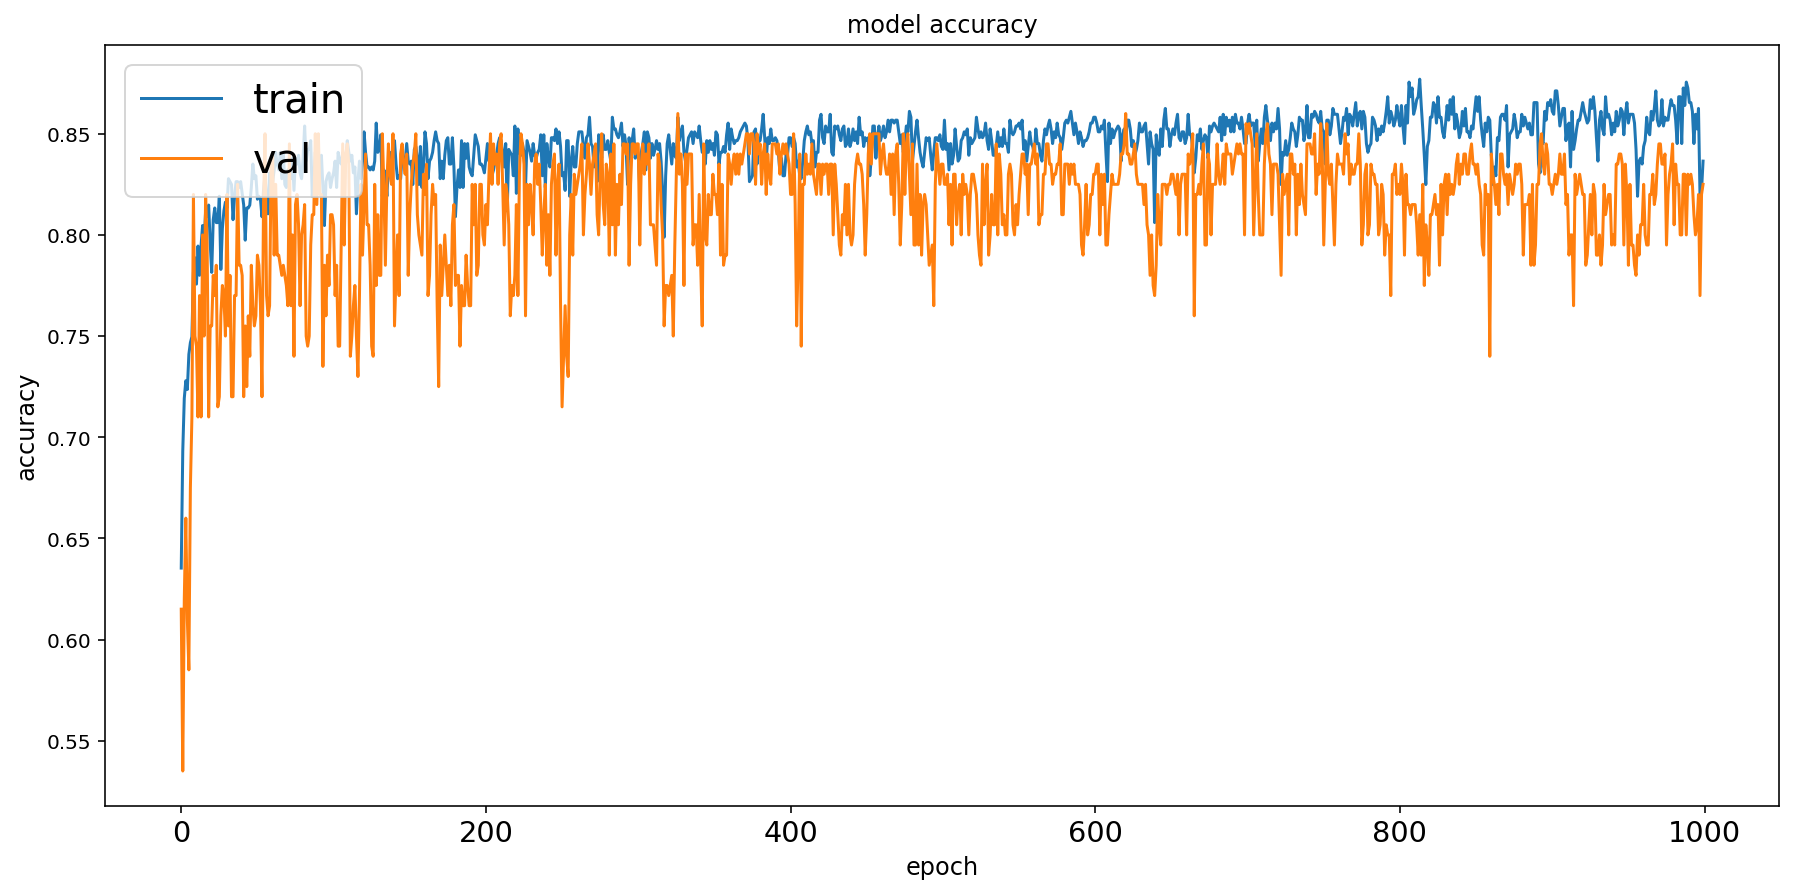

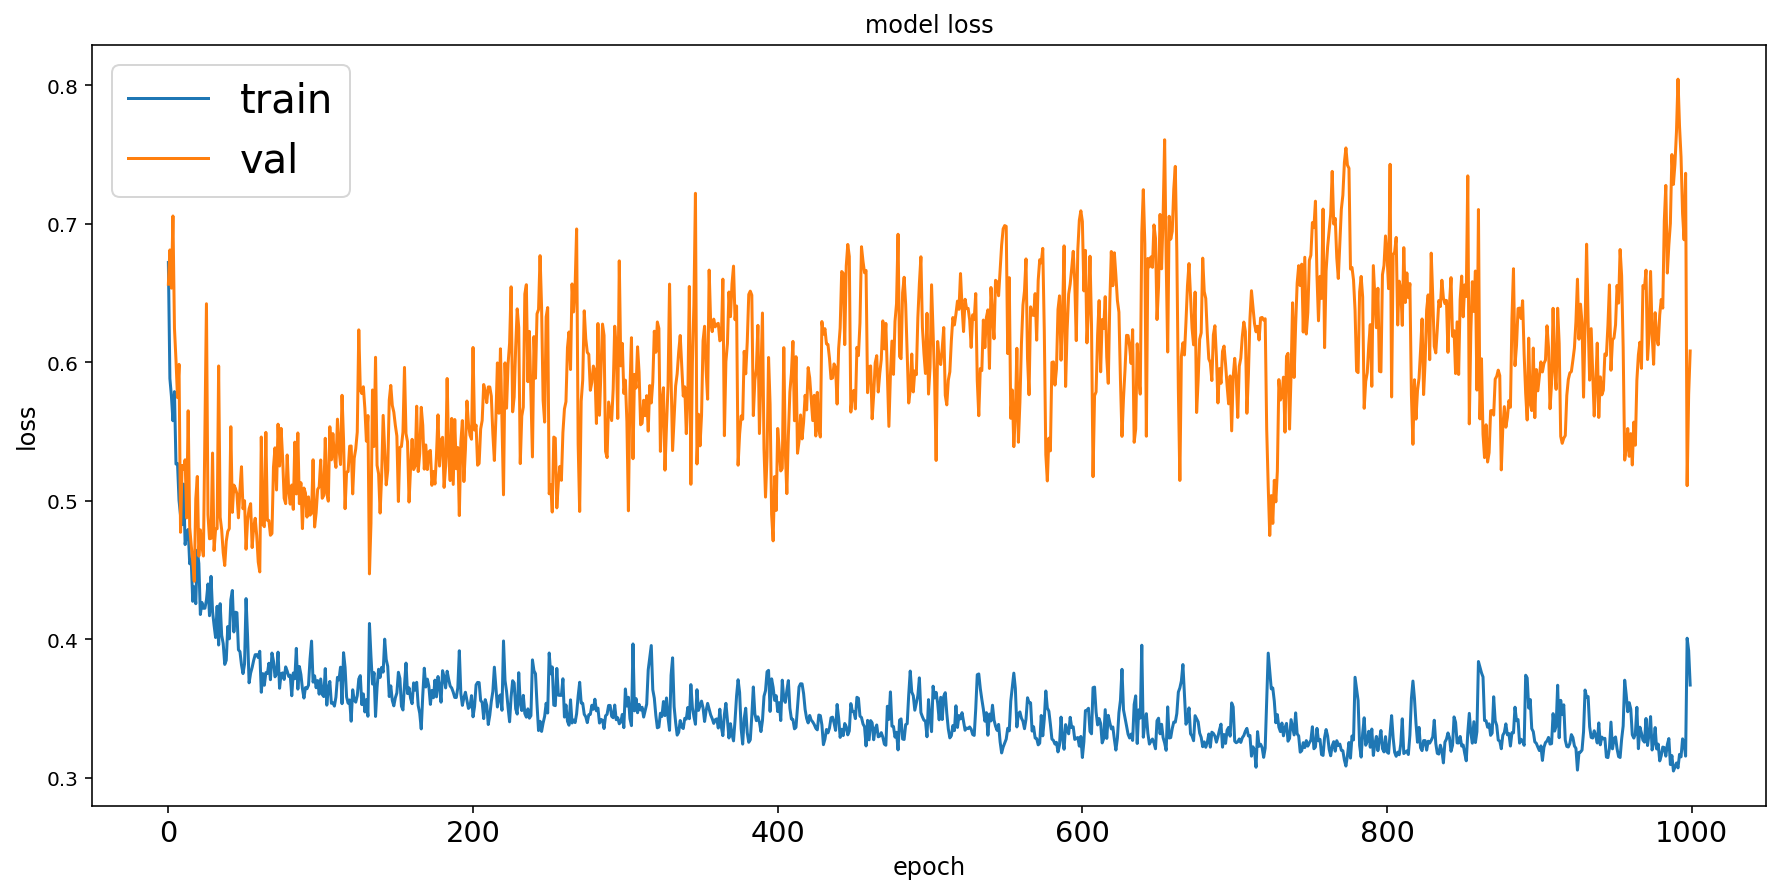

In [412]:
plotAccLoss(history)

# Model2 - Masively large NN (for the dataset)

In [413]:
model2 = tf.keras.Sequential([
    
        tf.keras.layers.Dense(67, activation = 'relu'),
        tf.keras.layers.Dense(670, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(2, activation = 'softmax')
])

In [414]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=150)

model2.compile(optimizer=keras.optimizers.Adam(lr=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history2 = model2.fit(
    train_features, train_labels, epochs=1000, validation_data=(
        val_features, val_labels))  #, callbacks=[early_stopping]

Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
 1/22 [>.............................] - ETA: 0s - loss: 1.4561 - accuracy: 0.4062WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002672D6F0510> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
22/22 [==============================] - 0s 8ms/step - loss: 2.4642 - accuracy: 0.6194 - val_loss: 1.1325 - val_accuracy: 0.6250
Epoch 2/100

22/22 [==============================] - 0s 4ms/step - loss: 0.3818 - accuracy: 0.8350 - val_loss: 0.4585 - val_accuracy: 0.8050
Epoch 52/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3682 - accuracy: 0.8292 - val_loss: 0.5115 - val_accuracy: 0.8250
Epoch 53/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3886 - accuracy: 0.8350 - val_loss: 0.4723 - val_accuracy: 0.7900
Epoch 54/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3844 - accuracy: 0.8365 - val_loss: 0.4620 - val_accuracy: 0.8550
Epoch 55/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3793 - accuracy: 0.8365 - val_loss: 0.4601 - val_accuracy: 0.8250
Epoch 56/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3810 - accuracy: 0.8292 - val_loss: 0.4612 - val_accuracy: 0.8000
Epoch 57/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3690 - accuracy: 0.8379 - val_loss: 0.4932 - val_accuracy: 0.8100
Epoch 58/1000

22/22 [==============================] - 0s 4ms/step - loss: 0.3694 - accuracy: 0.8365 - val_loss: 0.6274 - val_accuracy: 0.7950
Epoch 109/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.8307 - val_loss: 0.5127 - val_accuracy: 0.7900
Epoch 110/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3694 - accuracy: 0.8249 - val_loss: 0.5154 - val_accuracy: 0.8250
Epoch 111/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3648 - accuracy: 0.8292 - val_loss: 0.4762 - val_accuracy: 0.7750
Epoch 112/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3558 - accuracy: 0.8379 - val_loss: 0.5041 - val_accuracy: 0.8400
Epoch 113/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3600 - accuracy: 0.8423 - val_loss: 0.5149 - val_accuracy: 0.8100
Epoch 114/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3609 - accuracy: 0.8307 - val_loss: 0.5222 - val_accuracy: 0.7900
Epoch 1

Epoch 165/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3674 - accuracy: 0.8321 - val_loss: 0.4650 - val_accuracy: 0.7950
Epoch 166/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3626 - accuracy: 0.8423 - val_loss: 0.5120 - val_accuracy: 0.8300
Epoch 167/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3726 - accuracy: 0.8365 - val_loss: 0.5816 - val_accuracy: 0.7750
Epoch 168/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8408 - val_loss: 0.4785 - val_accuracy: 0.8200
Epoch 169/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8408 - val_loss: 0.5067 - val_accuracy: 0.8200
Epoch 170/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3721 - accuracy: 0.8350 - val_loss: 0.4910 - val_accuracy: 0.8400
Epoch 171/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3528 - accuracy: 0.8466 - val_loss: 0.5299 - val_accuracy:

Epoch 222/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3481 - accuracy: 0.8495 - val_loss: 0.5591 - val_accuracy: 0.7400
Epoch 223/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3532 - accuracy: 0.8408 - val_loss: 0.5515 - val_accuracy: 0.7700
Epoch 224/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3331 - accuracy: 0.8524 - val_loss: 0.5447 - val_accuracy: 0.7800
Epoch 225/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3653 - accuracy: 0.8292 - val_loss: 0.5188 - val_accuracy: 0.8150
Epoch 226/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3734 - accuracy: 0.8365 - val_loss: 0.5990 - val_accuracy: 0.8000
Epoch 227/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3954 - accuracy: 0.8249 - val_loss: 0.4810 - val_accuracy: 0.8350
Epoch 228/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3850 - accuracy: 0.8350 - val_loss: 0.5086 - val_accuracy:

Epoch 279/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3798 - accuracy: 0.8394 - val_loss: 0.5597 - val_accuracy: 0.7600
Epoch 280/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3786 - accuracy: 0.8321 - val_loss: 0.5452 - val_accuracy: 0.7700
Epoch 281/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8394 - val_loss: 0.5281 - val_accuracy: 0.7950
Epoch 282/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3732 - accuracy: 0.8350 - val_loss: 0.5587 - val_accuracy: 0.7150
Epoch 283/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3743 - accuracy: 0.8365 - val_loss: 0.5924 - val_accuracy: 0.7150
Epoch 284/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3545 - accuracy: 0.8480 - val_loss: 0.5036 - val_accuracy: 0.7800
Epoch 285/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3469 - accuracy: 0.8466 - val_loss: 0.5494 - val_accuracy:

Epoch 336/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3457 - accuracy: 0.8495 - val_loss: 0.5586 - val_accuracy: 0.8400
Epoch 337/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3591 - accuracy: 0.8379 - val_loss: 0.6619 - val_accuracy: 0.8150
Epoch 338/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3378 - accuracy: 0.8654 - val_loss: 0.6024 - val_accuracy: 0.8200
Epoch 339/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3496 - accuracy: 0.8437 - val_loss: 0.6508 - val_accuracy: 0.8150
Epoch 340/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.8553 - val_loss: 0.5882 - val_accuracy: 0.8400
Epoch 341/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3474 - accuracy: 0.8524 - val_loss: 0.5837 - val_accuracy: 0.8000
Epoch 342/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3600 - accuracy: 0.8307 - val_loss: 0.5659 - val_accuracy:

Epoch 393/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.8466 - val_loss: 0.5857 - val_accuracy: 0.7850
Epoch 394/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3638 - accuracy: 0.8437 - val_loss: 0.6041 - val_accuracy: 0.8000
Epoch 395/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3521 - accuracy: 0.8394 - val_loss: 0.6387 - val_accuracy: 0.7800
Epoch 396/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8553 - val_loss: 0.6682 - val_accuracy: 0.8050
Epoch 397/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3463 - accuracy: 0.8538 - val_loss: 0.6510 - val_accuracy: 0.7450
Epoch 398/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3463 - accuracy: 0.8452 - val_loss: 0.6680 - val_accuracy: 0.8100
Epoch 399/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3461 - accuracy: 0.8452 - val_loss: 0.6341 - val_accuracy:

Epoch 450/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3630 - accuracy: 0.8495 - val_loss: 0.5345 - val_accuracy: 0.7900
Epoch 451/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8452 - val_loss: 0.6219 - val_accuracy: 0.8100
Epoch 452/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3401 - accuracy: 0.8509 - val_loss: 0.7153 - val_accuracy: 0.7800
Epoch 453/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3550 - accuracy: 0.8379 - val_loss: 0.6157 - val_accuracy: 0.8200
Epoch 454/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3423 - accuracy: 0.8495 - val_loss: 0.6583 - val_accuracy: 0.8250
Epoch 455/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3363 - accuracy: 0.8553 - val_loss: 0.6866 - val_accuracy: 0.7900
Epoch 456/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8394 - val_loss: 0.6690 - val_accuracy:

Epoch 507/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3355 - accuracy: 0.8365 - val_loss: 0.7651 - val_accuracy: 0.7900
Epoch 508/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3451 - accuracy: 0.8480 - val_loss: 0.7543 - val_accuracy: 0.7500
Epoch 509/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3595 - accuracy: 0.8480 - val_loss: 0.6588 - val_accuracy: 0.7650
Epoch 510/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3664 - accuracy: 0.8365 - val_loss: 0.5059 - val_accuracy: 0.8350
Epoch 511/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3606 - accuracy: 0.8321 - val_loss: 0.4890 - val_accuracy: 0.7900
Epoch 512/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8582 - val_loss: 0.5315 - val_accuracy: 0.7800
Epoch 513/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3460 - accuracy: 0.8538 - val_loss: 0.5294 - val_accuracy:

Epoch 564/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3468 - accuracy: 0.8379 - val_loss: 0.7781 - val_accuracy: 0.7550
Epoch 565/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3511 - accuracy: 0.8408 - val_loss: 0.6651 - val_accuracy: 0.7600
Epoch 566/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3685 - accuracy: 0.8379 - val_loss: 0.5106 - val_accuracy: 0.7950
Epoch 567/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3709 - accuracy: 0.8408 - val_loss: 0.4644 - val_accuracy: 0.8200
Epoch 568/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3801 - accuracy: 0.8480 - val_loss: 0.4791 - val_accuracy: 0.8300
Epoch 569/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3696 - accuracy: 0.8321 - val_loss: 0.6863 - val_accuracy: 0.8300
Epoch 570/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3869 - accuracy: 0.8336 - val_loss: 0.4839 - val_accuracy:

Epoch 621/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3542 - accuracy: 0.8611 - val_loss: 0.5182 - val_accuracy: 0.7550
Epoch 622/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3534 - accuracy: 0.8437 - val_loss: 0.4659 - val_accuracy: 0.8300
Epoch 623/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3538 - accuracy: 0.8408 - val_loss: 0.5154 - val_accuracy: 0.7850
Epoch 624/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3555 - accuracy: 0.8321 - val_loss: 0.5097 - val_accuracy: 0.8000
Epoch 625/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3402 - accuracy: 0.8582 - val_loss: 0.5154 - val_accuracy: 0.8300
Epoch 626/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3431 - accuracy: 0.8640 - val_loss: 0.5570 - val_accuracy: 0.7550
Epoch 627/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8669 - val_loss: 0.5129 - val_accuracy:

Epoch 678/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3401 - accuracy: 0.8553 - val_loss: 0.6834 - val_accuracy: 0.7900
Epoch 679/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3374 - accuracy: 0.8538 - val_loss: 0.7248 - val_accuracy: 0.7400
Epoch 680/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3436 - accuracy: 0.8495 - val_loss: 0.7470 - val_accuracy: 0.8000
Epoch 681/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.8365 - val_loss: 0.8791 - val_accuracy: 0.7650
Epoch 682/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3553 - accuracy: 0.8423 - val_loss: 0.7213 - val_accuracy: 0.7800
Epoch 683/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3471 - accuracy: 0.8437 - val_loss: 0.6110 - val_accuracy: 0.8050
Epoch 684/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3492 - accuracy: 0.8437 - val_loss: 0.7034 - val_accuracy:

22/22 [==============================] - 0s 3ms/step - loss: 0.3531 - accuracy: 0.8509 - val_loss: 0.5908 - val_accuracy: 0.7750
Epoch 735/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3412 - accuracy: 0.8480 - val_loss: 0.6309 - val_accuracy: 0.8200
Epoch 736/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3480 - accuracy: 0.8553 - val_loss: 0.5433 - val_accuracy: 0.7650
Epoch 737/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8770 - val_loss: 0.5604 - val_accuracy: 0.8300
Epoch 738/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3358 - accuracy: 0.8640 - val_loss: 0.6492 - val_accuracy: 0.7750
Epoch 739/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3424 - accuracy: 0.8582 - val_loss: 0.6990 - val_accuracy: 0.7900
Epoch 740/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3436 - accuracy: 0.8524 - val_loss: 0.6861 - val_accuracy: 0.7700
Epoch 7

Epoch 791/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3362 - accuracy: 0.8582 - val_loss: 0.7877 - val_accuracy: 0.7800
Epoch 792/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3473 - accuracy: 0.8596 - val_loss: 0.6539 - val_accuracy: 0.7850
Epoch 793/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3516 - accuracy: 0.8452 - val_loss: 0.5176 - val_accuracy: 0.7950
Epoch 794/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3547 - accuracy: 0.8538 - val_loss: 0.4785 - val_accuracy: 0.8200
Epoch 795/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3337 - accuracy: 0.8669 - val_loss: 0.5421 - val_accuracy: 0.8250
Epoch 796/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3364 - accuracy: 0.8553 - val_loss: 0.5904 - val_accuracy: 0.8200
Epoch 797/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3415 - accuracy: 0.8625 - val_loss: 0.5273 - val_accuracy:

Epoch 848/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3375 - accuracy: 0.8538 - val_loss: 0.7274 - val_accuracy: 0.8100
Epoch 849/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3269 - accuracy: 0.8640 - val_loss: 0.8181 - val_accuracy: 0.8250
Epoch 850/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3371 - accuracy: 0.8553 - val_loss: 0.6912 - val_accuracy: 0.8150
Epoch 851/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3492 - accuracy: 0.8553 - val_loss: 0.8202 - val_accuracy: 0.7750
Epoch 852/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3602 - accuracy: 0.8524 - val_loss: 0.5069 - val_accuracy: 0.7900
Epoch 853/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3619 - accuracy: 0.8408 - val_loss: 0.5006 - val_accuracy: 0.8200
Epoch 854/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3326 - accuracy: 0.8625 - val_loss: 0.5096 - val_accuracy:

Epoch 905/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.3363 - accuracy: 0.8495 - val_loss: 0.7565 - val_accuracy: 0.7600
Epoch 906/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3314 - accuracy: 0.8509 - val_loss: 0.7840 - val_accuracy: 0.8050
Epoch 907/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3268 - accuracy: 0.8553 - val_loss: 0.8375 - val_accuracy: 0.7150
Epoch 908/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.3434 - accuracy: 0.8466 - val_loss: 0.8435 - val_accuracy: 0.7600
Epoch 909/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3367 - accuracy: 0.8524 - val_loss: 0.7779 - val_accuracy: 0.8200
Epoch 910/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3470 - accuracy: 0.8625 - val_loss: 0.7819 - val_accuracy: 0.7800
Epoch 911/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3544 - accuracy: 0.8480 - val_loss: 0.8603 - val_accuracy:

Epoch 962/1000
22/22 [==============================] - 0s 3ms/step - loss: 0.3440 - accuracy: 0.8567 - val_loss: 0.6168 - val_accuracy: 0.7800
Epoch 963/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3301 - accuracy: 0.8640 - val_loss: 0.6559 - val_accuracy: 0.7650
Epoch 964/1000
22/22 [==============================] - 0s 5ms/step - loss: 0.3587 - accuracy: 0.8437 - val_loss: 0.5216 - val_accuracy: 0.8000
Epoch 965/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8466 - val_loss: 0.6393 - val_accuracy: 0.8000
Epoch 966/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3317 - accuracy: 0.8538 - val_loss: 0.6314 - val_accuracy: 0.8150
Epoch 967/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3458 - accuracy: 0.8654 - val_loss: 0.6995 - val_accuracy: 0.7650
Epoch 968/1000
22/22 [==============================] - 0s 4ms/step - loss: 0.3333 - accuracy: 0.8625 - val_loss: 0.7197 - val_accuracy:

In [415]:
def plotAccLoss(history):
    '''Will take model history as arg & plot accuracy and loss of Test and Val data.'''
    plt.figure(figsize=(15,7))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model 2 accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

    plt.figure(figsize=(15,7))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model 2 loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()

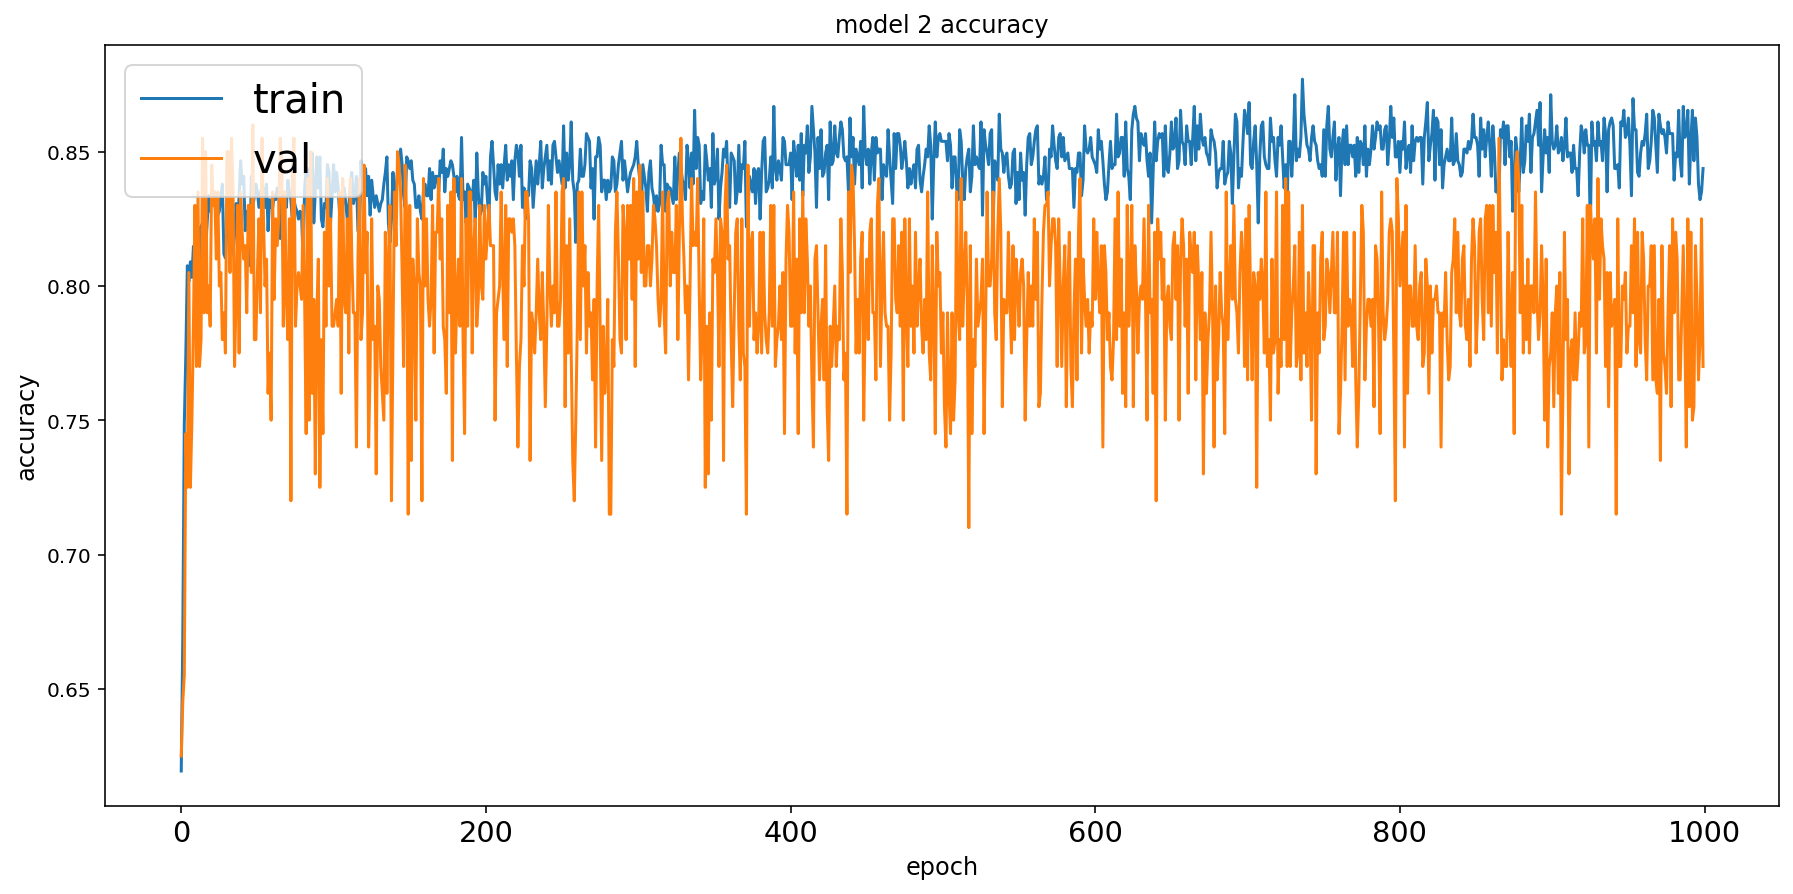

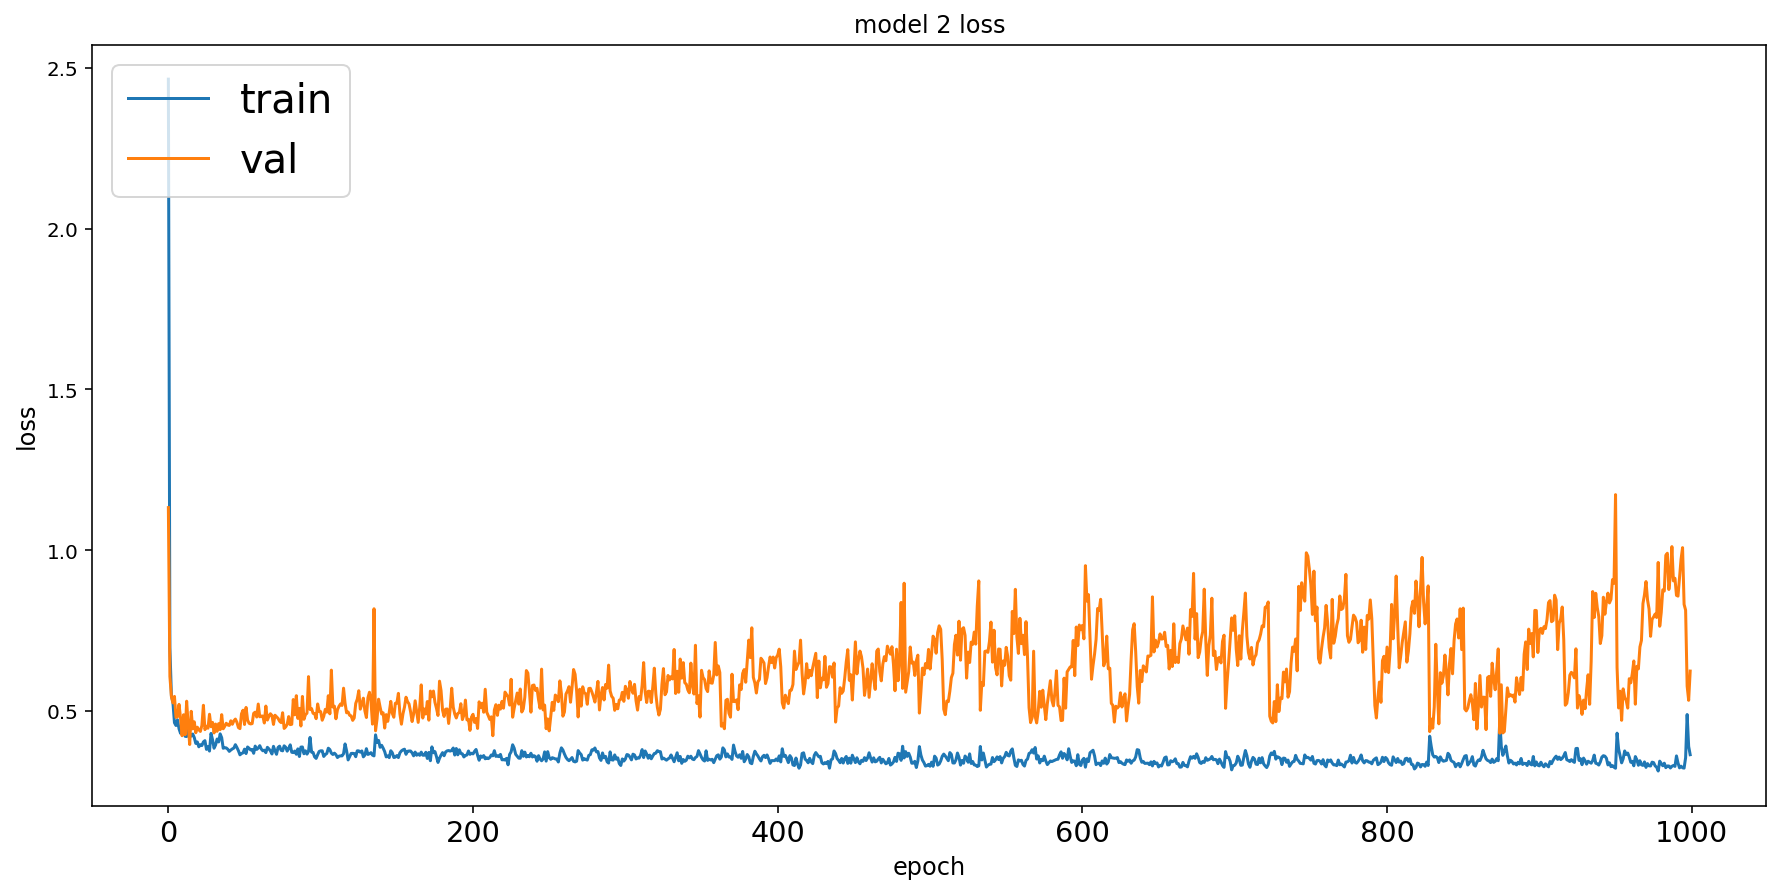

In [416]:
plotAccLoss(history2)

### Hyperparameter Tuning - For SKlearn classifier block 1.  Not Keras Model.

In [1]:
run_gs = False

if run_gs:
    parameter_grid = {
        'max_depth':[4,6,8],
        'n_estimators':[50,10],
        'max_features':['sqrt','auto','log2'],
        'min_samples_split':[2,3,10],
        'min_samples_leaf':[1,3,10],
        'bootstrap':[True,False],
        }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=5)

    grid_search=GridSearchCV(forest,
                            scoring='accuracy',
                            param_grid=parameter_grid,
                            cv=cross_validation,
                            verbose=1)
    grid_search.fit(train,targets)
    model = grid_search
    parameters = grid_search.best_params_
    
    print('Best score: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else:
    parameters = {'bootstrap':False, 'min_samples_leaf':3, 'n_estimators':50,
                 'min_samples_split':10,'max_features': 'sqrt','max_depth':6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(train,targets)
    


NameError: name 'RandomForestClassifier' is not defined

### Run Inference

In [876]:
output = model.predict(test).astype(int)
df_output = pd.DataFrame()
aux = pd.read_csv('.\\data\\test.csv')
df_output['PassengerId']= aux['PassengerId']
df_output['Survived']=output
df_output[['PassengerId','Survived']].to_csv('gridsearch_rf.csv', index=False)